Carregando o CSV com os dados dos alunos referentes à 2016

import os
import pandas as pd
import numpy as np3

if not os.path.exists("data"):
    os.mkdir("data")
    !cd data && curl -O {"http://download.inep.gov.br/microdados/microdados_censo_superior_2016.zip"} && unzip {"'*.zip'"}
    !cd data/DADOS && unrar e "*.rar" && mv *.CSV ../
    !cd data && rm -r ANEXOS LEIA-ME DADOS FILTROS && rm microdados_censo_superior_2016.zip



Coloquei em markdown porque tava demorando pra baixar, já que eu tinha os arquivos aqui... preferi deixar assim por enquanto

In [1]:
import pandas as pd
import numpy as np

dataframe_alunos_2016 =  pd.read_csv('data/DM_ALUNO.CSV',
                                     sep='|', encoding='latin1',
                                     usecols=['CO_IES','NO_IES' , 'CO_CATEGORIA_ADMINISTRATIVA', 'CO_ALUNO_CURSO', 'DS_COR_RACA_ALUNO',
                                            'CO_MODALIDADE_ENSINO', 'NO_OCDE', 'CO_ALUNO_SITUACAO', 'CO_TIPO_ESCOLA_ENS_MEDIO', 'IN_DEF_FISICA'])
dataframe_alunos_2016.head()

,CO_IES,NO_IES,CO_CATEGORIA_ADMINISTRATIVA,CO_MODALIDADE_ENSINO,NO_OCDE,CO_ALUNO_CURSO,DS_COR_RACA_ALUNO,IN_DEF_FISICA,CO_ALUNO_SITUACAO,CO_TIPO_ESCOLA_ENS_MEDIO
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,Direito,25001314,Parda,NaN,2,1
1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,Direito,25037243,Parda,NaN,2,1
2,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,Direito,25030916,Preta,NaN,3,1
3,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,Direito,25016919,Parda,NaN,3,1
4,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,Direito,25001942,Parda,NaN,4,1


In [3]:

DF_alunos2016 = dataframe_alunos_2016  #pd.read_csv('data/alunos2016.csv')
DF_alunos2016.head()

,CO_IES,NO_IES,CO_CATEGORIA_ADMINISTRATIVA,CO_MODALIDADE_ENSINO,NO_OCDE,CO_ALUNO_CURSO,DS_COR_RACA_ALUNO,IN_DEF_FISICA,CO_ALUNO_SITUACAO,CO_TIPO_ESCOLA_ENS_MEDIO
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,Direito,25001314,Parda,NaN,2,1
1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,Direito,25037243,Parda,NaN,2,1
2,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,Direito,25030916,Preta,NaN,3,1
3,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,Direito,25016919,Parda,NaN,3,1
4,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,Direito,25001942,Parda,NaN,4,1


In [4]:
qtd_cursos = len(DF_alunos2016.NO_OCDE.drop_duplicates())
qtd_cursos

350

In [5]:
curso_raca_Publico = DF_alunos2016[((DF_alunos2016.CO_CATEGORIA_ADMINISTRATIVA == 1)|(DF_alunos2016.CO_CATEGORIA_ADMINISTRATIVA == 2)|
                                  (DF_alunos2016.CO_CATEGORIA_ADMINISTRATIVA == 3))]

curso_raca_Publico = pd.melt(curso_raca_Publico, id_vars = 'NO_OCDE', value_vars ='DS_COR_RACA_ALUNO')

curso_raca_Publico.head()



,NO_OCDE,variable,value
0,Direito,DS_COR_RACA_ALUNO,Parda
1,Direito,DS_COR_RACA_ALUNO,Parda
2,Direito,DS_COR_RACA_ALUNO,Preta
3,Direito,DS_COR_RACA_ALUNO,Parda
4,Direito,DS_COR_RACA_ALUNO,Parda


In [6]:
curso_raca_Privado = DF_alunos2016[((DF_alunos2016.CO_CATEGORIA_ADMINISTRATIVA == 4)|(DF_alunos2016.CO_CATEGORIA_ADMINISTRATIVA == 5))]

curso_raca_Privado = pd.melt(curso_raca_Privado, id_vars = 'NO_OCDE', value_vars ='DS_COR_RACA_ALUNO')

curso_raca_Privado.head()

,NO_OCDE,variable,value
0,Formação de professor de filosofia,DS_COR_RACA_ALUNO,Preta
1,Formação de professor de filosofia,DS_COR_RACA_ALUNO,Branca
2,Formação de professor de filosofia,DS_COR_RACA_ALUNO,Aluno não quis declarar cor/raça
3,Formação de professor de filosofia,DS_COR_RACA_ALUNO,Branca
4,Formação de professor de filosofia,DS_COR_RACA_ALUNO,Aluno não quis declarar cor/raça


In [7]:
curso_raca_Publico = curso_raca_Publico.rename(columns= {'value' : 'raca'})
curso_raca_Publico = curso_raca_Publico.rename(columns= {'NO_OCDE' : 'curso'})
curso_raca_Publico = curso_raca_Publico.rename(columns= {'variable' : 'qtd'})

curso_raca_Publico = curso_raca_Publico.replace(to_replace = 'DS_COR_RACA_ALUNO', value = 1)

curso_raca_Publico = curso_raca_Publico.pivot_table(index = 'curso', columns='raca', values= 'qtd',aggfunc='sum')

curso_raca_Publico.head()

raca,Aluno não quis declarar cor/raça,Amarela,Branca,Indígena,Não dispõe da informação,Parda,Preta
curso,,,,,,,
Acústica,4.0,NaN,187.0,NaN,NaN,19.0,10.0
Administração,26373.0,1435.0,36738.0,452.0,3531.0,25066.0,6898.0
Administração de cooperativas,246.0,16.0,375.0,6.0,3.0,332.0,140.0
Administração de redes,696.0,39.0,1510.0,7.0,158.0,1179.0,337.0
Administração dos serviços de saúde,698.0,29.0,676.0,39.0,49.0,712.0,218.0


In [8]:
curso_raca_Privado = curso_raca_Privado.rename(columns= {'value' : 'raca'})
curso_raca_Privado = curso_raca_Privado.rename(columns= {'NO_OCDE' : 'curso'})
curso_raca_Privado = curso_raca_Privado.rename(columns= {'variable' : 'qtd'})

curso_raca_Privado = curso_raca_Privado.replace(to_replace = 'DS_COR_RACA_ALUNO', value = 1)

curso_raca_Privado = curso_raca_Privado.pivot_table(index = 'curso', columns='raca', values= 'qtd',aggfunc='sum')

curso_raca_Privado.head()

raca,Aluno não quis declarar cor/raça,Amarela,Branca,Indígena,Não dispõe da informação,Parda,Preta
curso,,,,,,,
Administração,318098.0,13671.0,351847.0,4318.0,31094.0,218476.0,47193.0
Administração de cooperativas,152.0,1.0,222.0,NaN,3.0,50.0,16.0
Administração de redes,10598.0,536.0,9767.0,191.0,766.0,7739.0,2281.0
Administração de sistemas de informações,NaN,NaN,NaN,NaN,NaN,6.0,NaN
Administração dos serviços de saúde,139.0,5.0,162.0,1.0,NaN,72.0,13.0


In [9]:
curso_raca_Publico.loc['Administração']

raca
Aluno não quis declarar cor/raça    26373.0
Amarela                              1435.0
Branca                              36738.0
Indígena                              452.0
Não dispõe da informação             3531.0
Parda                               25066.0
Preta                                6898.0
Name: Administração, dtype: float64

Com isso, podemos selecionar relações entre os cursos e as raças

In [10]:
for i in range(0,6):
    print(curso_raca_Publico.iloc[:,i].idxmax())



Pedagogia
Pedagogia
Pedagogia
Licenciatura Intercultural Indígena
Pedagogia
Pedagogia


Pegando o curso com maior qtd por coluna

In [11]:
curso_raca_Publico.iloc[:].nlargest(5,'Amarela')

raca,Aluno não quis declarar cor/raça,Amarela,Branca,Indígena,Não dispõe da informação,Parda,Preta
curso,,,,,,,
Pedagogia,42901.0,1543.0,38189.0,1396.0,6822.0,42480.0,13311.0
Administração,26373.0,1435.0,36738.0,452.0,3531.0,25066.0,6898.0
Medicina,9749.0,1143.0,23103.0,339.0,1349.0,11599.0,3080.0
Direito,20676.0,915.0,32749.0,546.0,2818.0,20620.0,6687.0
Formação de professor de matemática,20404.0,892.0,20531.0,342.0,2315.0,24668.0,5803.0


Dessa forma mostra os n maiores cursos por raça, mas "ordena" pela coluna selecionada, nesse caso, foi "Amarela"

In [12]:
curso_raca_Publico.fillna(0,inplace = True)
curso_raca_Privado.fillna(0,inplace = True)

In [13]:
curso_raca_Publico['total'] = (curso_raca_Publico['Amarela'] + curso_raca_Publico['Aluno não quis declarar cor/raça'] + curso_raca_Publico['Branca'] 
                               + curso_raca_Publico['Indígena'] +  curso_raca_Publico['Parda'] + curso_raca_Publico['Preta'] + curso_raca_Publico['Não dispõe da informação'] )

curso_raca_Privado['total'] = (curso_raca_Privado['Amarela'] + curso_raca_Privado['Aluno não quis declarar cor/raça'] + curso_raca_Privado['Branca'] 
                               + curso_raca_Privado['Indígena'] + curso_raca_Privado['Parda'] + curso_raca_Privado['Preta'] + curso_raca_Privado['Não dispõe da informação'] )


In [14]:
curso_raca_Publico['% Branca'] =np.round((curso_raca_Publico['Branca'] / curso_raca_Publico['total']) *100, decimals=2)
curso_raca_Publico['% Amarela'] = np.round((curso_raca_Publico['Amarela'] / curso_raca_Publico['total']) * 100, decimals=2)
curso_raca_Publico['% Indígena'] = np.round((curso_raca_Publico['Indígena'] / curso_raca_Publico['total']) *100, decimals=2)
curso_raca_Publico['% Parda'] = np.round((curso_raca_Publico['Parda'] / curso_raca_Publico['total']) *100, decimals=2)
curso_raca_Publico['% Preta'] = np.round((curso_raca_Publico['Preta'] / curso_raca_Publico['total']) *100, decimals=2)
curso_raca_Publico['% Aluno não quis declarar cor/raça'] = np.round((curso_raca_Publico['Aluno não quis declarar cor/raça'] / curso_raca_Publico['total']) *100,decimals=2)
curso_raca_Publico['% Não dispõe da informação'] = np.round((curso_raca_Publico['Não dispõe da informação'] / curso_raca_Publico['total']) *100,decimals=2)


curso_raca_Privado['% Branca'] =np.round((curso_raca_Privado['Branca'] / curso_raca_Privado['total']) *100, decimals=2)
curso_raca_Privado['% Amarela'] = np.round((curso_raca_Privado['Amarela'] / curso_raca_Privado['total']) * 100, decimals=2)
curso_raca_Privado['% Indígena'] = np.round((curso_raca_Privado['Indígena'] / curso_raca_Privado['total']) *100, decimals=2)
curso_raca_Privado['% Parda'] = np.round((curso_raca_Privado['Parda'] / curso_raca_Privado['total']) *100, decimals=2)
curso_raca_Privado['% Preta'] = np.round((curso_raca_Privado['Preta'] / curso_raca_Privado['total']) *100, decimals=2)
curso_raca_Privado['% Aluno não quis declarar cor/raça'] = np.round((curso_raca_Privado['Aluno não quis declarar cor/raça'] / curso_raca_Privado['total']) *100,decimals=2)
curso_raca_Privado['% Não dispõe da informação'] = np.round((curso_raca_Privado['Não dispõe da informação'] / curso_raca_Privado['total']) *100,decimals=2)


In [15]:
curso_raca_Publico.iloc[:].nlargest(5,'total')

raca,Aluno não quis declarar cor/raça,Amarela,Branca,Indígena,Não dispõe da informação,Parda,Preta,total,% Branca,% Amarela,% Indígena,% Parda,% Preta,% Aluno não quis declarar cor/raça,% Não dispõe da informação
curso,,,,,,,,,,,,,,,
Pedagogia,42901.0,1543.0,38189.0,1396.0,6822.0,42480.0,13311.0,146642.0,26.04,1.05,0.95,28.97,9.08,29.26,4.65
Administração,26373.0,1435.0,36738.0,452.0,3531.0,25066.0,6898.0,100493.0,36.56,1.43,0.45,24.94,6.86,26.24,3.51
Direito,20676.0,915.0,32749.0,546.0,2818.0,20620.0,6687.0,85011.0,38.52,1.08,0.64,24.26,7.87,24.32,3.31
Formação de professor de matemática,20404.0,892.0,20531.0,342.0,2315.0,24668.0,5803.0,74955.0,27.39,1.19,0.46,32.91,7.74,27.22,3.09
Formação de professor de biologia,18773.0,839.0,20697.0,353.0,3154.0,20781.0,5900.0,70497.0,29.36,1.19,0.50,29.48,8.37,26.63,4.47


In [16]:
curso_raca_Privado.iloc[:].nlargest(5,'total')

raca,Aluno não quis declarar cor/raça,Amarela,Branca,Indígena,Não dispõe da informação,Parda,Preta,total,% Branca,% Amarela,% Indígena,% Parda,% Preta,% Aluno não quis declarar cor/raça,% Não dispõe da informação
curso,,,,,,,,,,,,,,,
Direito,286339.0,16112.0,414446.0,5861.0,20614.0,234826.0,55133.0,1033331.0,40.11,1.56,0.57,22.73,5.34,27.71,1.99
Administração,318098.0,13671.0,351847.0,4318.0,31094.0,218476.0,47193.0,984697.0,35.73,1.39,0.44,22.19,4.79,32.30,3.16
Pedagogia,249834.0,8469.0,252705.0,4390.0,26626.0,177443.0,39686.0,759153.0,33.29,1.12,0.58,23.37,5.23,32.91,3.51
Ciências contábeis,152356.0,6701.0,152717.0,2381.0,9799.0,110862.0,22815.0,457631.0,33.37,1.46,0.52,24.23,4.99,33.29,2.14
Engenharia civil,122791.0,8584.0,175045.0,3366.0,6322.0,98270.0,22761.0,437139.0,40.04,1.96,0.77,22.48,5.21,28.09,1.45


In [17]:
IES_raca_Privado = DF_alunos2016[((DF_alunos2016.CO_CATEGORIA_ADMINISTRATIVA == 4)|(DF_alunos2016.CO_CATEGORIA_ADMINISTRATIVA == 5))]
IES_raca_Privado = pd.melt(IES_raca_Privado, id_vars = 'NO_IES', value_vars ='DS_COR_RACA_ALUNO')

IES_raca_Privado.head()


,NO_IES,variable,value
0,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,DS_COR_RACA_ALUNO,Preta
1,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,DS_COR_RACA_ALUNO,Branca
2,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,DS_COR_RACA_ALUNO,Aluno não quis declarar cor/raça
3,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,DS_COR_RACA_ALUNO,Branca
4,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,DS_COR_RACA_ALUNO,Aluno não quis declarar cor/raça


In [18]:
IES_raca_Publico = DF_alunos2016[((DF_alunos2016.CO_CATEGORIA_ADMINISTRATIVA == 1)|(DF_alunos2016.CO_CATEGORIA_ADMINISTRATIVA == 2)
                                 |(DF_alunos2016.CO_CATEGORIA_ADMINISTRATIVA == 3) )]
IES_raca_Publico = pd.melt(IES_raca_Publico, id_vars = 'NO_IES', value_vars ='DS_COR_RACA_ALUNO')

IES_raca_Publico.head()


,NO_IES,variable,value
0,UNIVERSIDADE FEDERAL DE MATO GROSSO,DS_COR_RACA_ALUNO,Parda
1,UNIVERSIDADE FEDERAL DE MATO GROSSO,DS_COR_RACA_ALUNO,Parda
2,UNIVERSIDADE FEDERAL DE MATO GROSSO,DS_COR_RACA_ALUNO,Preta
3,UNIVERSIDADE FEDERAL DE MATO GROSSO,DS_COR_RACA_ALUNO,Parda
4,UNIVERSIDADE FEDERAL DE MATO GROSSO,DS_COR_RACA_ALUNO,Parda


In [19]:
IES_raca_Publico = IES_raca_Publico.rename(columns= {'value' : 'raca'})
IES_raca_Publico = IES_raca_Publico.rename(columns= {'NO_IES' : 'IES'})
IES_raca_Publico = IES_raca_Publico.rename(columns= {'variable' : 'qtd'})

IES_raca_Publico = IES_raca_Publico.replace(to_replace = 'DS_COR_RACA_ALUNO', value = 1)

IES_raca_Publico = IES_raca_Publico.pivot_table(index = 'IES', columns='raca', values= 'qtd',aggfunc='sum')

IES_raca_Publico.head()

raca,Aluno não quis declarar cor/raça,Amarela,Branca,Indígena,Não dispõe da informação,Parda,Preta
IES,,,,,,,
CENTRO DE EDUCAÇÃO TÉCNICA DA UTRAMIG,35.0,NaN,9.0,1.0,NaN,15.0,1.0
CENTRO DE ENSINO SUPERIOR DE ARCOVERDE,954.0,3.0,63.0,8.0,172.0,146.0,22.0
CENTRO DE ENSINO SUPERIOR DO VALE SÃO FRANCISCO,93.0,8.0,51.0,29.0,300.0,417.0,88.0
CENTRO FEDERAL DE EDUCAÇÃO TECNOLÓGICA CELSO SUCKOW DA FONSECA,5476.0,16.0,802.0,8.0,1.0,1121.0,167.0
CENTRO FEDERAL DE EDUCAÇÃO TECNOLÓGICA DE MINAS GERAIS,721.0,183.0,2391.0,11.0,390.0,1811.0,354.0


In [20]:
IES_raca_Privado = IES_raca_Privado.rename(columns= {'value' : 'raca'})
IES_raca_Privado = IES_raca_Privado.rename(columns= {'NO_IES' : 'IES'})
IES_raca_Privado = IES_raca_Privado.rename(columns= {'variable' : 'qtd'})

IES_raca_Privado = IES_raca_Privado.replace(to_replace = 'DS_COR_RACA_ALUNO', value = 1)

IES_raca_Privado = IES_raca_Privado.pivot_table(index = 'IES', columns='raca', values= 'qtd',aggfunc='sum')

IES_raca_Privado.head()

raca,Aluno não quis declarar cor/raça,Amarela,Branca,Indígena,Não dispõe da informação,Parda,Preta
IES,,,,,,,
ABEU - CENTRO UNIVERSITÁRIO,979.0,83.0,1822.0,18.0,440.0,2255.0,731.0
ALFA - Faculdade de Almenara,421.0,1.0,18.0,1.0,22.0,48.0,2.0
CASTELLI ESCOLA SUPERIOR DE HOTELARIA,43.0,1.0,19.0,NaN,1.0,3.0,NaN
CENTRO DE ENSINO SUPERIOR ARCANJO MIKAEL DE ARAPIRACA,140.0,2.0,159.0,NaN,NaN,185.0,5.0
CENTRO DE ENSINO SUPERIOR DE CATALÃO,14.0,38.0,769.0,1.0,24.0,449.0,64.0


In [21]:
IES_raca_Publico.fillna(0,inplace = True)

IES_raca_Privado.fillna(0,inplace = True)

In [22]:
IES_raca_Publico['total'] = (IES_raca_Publico['Amarela'] + IES_raca_Publico['Aluno não quis declarar cor/raça'] + IES_raca_Publico['Branca'] + IES_raca_Publico['Indígena']
                    +  IES_raca_Publico['Parda'] + IES_raca_Publico['Preta'] + IES_raca_Publico['Não dispõe da informação'] )



IES_raca_Privado['total'] = (IES_raca_Privado['Amarela'] + IES_raca_Privado['Aluno não quis declarar cor/raça'] + IES_raca_Privado['Branca'] + IES_raca_Privado['Indígena']
                    +  IES_raca_Privado['Parda'] + IES_raca_Privado['Preta'] + IES_raca_Privado['Não dispõe da informação'] )
                    
                    

In [23]:
IES_raca_Publico['% Branca'] =np.round((IES_raca_Publico['Branca'] / IES_raca_Publico['total']) *100, decimals=2)
IES_raca_Publico['% Amarela'] = np.round((IES_raca_Publico['Amarela'] / IES_raca_Publico['total']) * 100, decimals=2)
IES_raca_Publico['% Indígena'] = np.round((IES_raca_Publico['Indígena'] / IES_raca_Publico['total']) *100, decimals=2)
IES_raca_Publico['% Parda'] = np.round((IES_raca_Publico['Parda'] / IES_raca_Publico['total']) *100, decimals=2)
IES_raca_Publico['% Preta'] = np.round((IES_raca_Publico['Preta'] / IES_raca_Publico['total']) *100, decimals=2)
IES_raca_Publico['% Aluno não quis declarar cor/raça'] = np.round((IES_raca_Publico['Aluno não quis declarar cor/raça'] / IES_raca_Publico['total']) *100,decimals=2)
IES_raca_Publico['% Não dispõe da informação'] = np.round((IES_raca_Publico['Não dispõe da informação'] / IES_raca_Publico['total']) *100,decimals=2)


IES_raca_Privado['% Branca'] =np.round((IES_raca_Privado['Branca'] / IES_raca_Privado['total']) *100, decimals=2)
IES_raca_Privado['% Amarela'] = np.round((IES_raca_Privado['Amarela'] / IES_raca_Privado['total']) * 100, decimals=2)
IES_raca_Privado['% Indígena'] = np.round((IES_raca_Privado['Indígena'] / IES_raca_Privado['total']) *100, decimals=2)
IES_raca_Privado['% Parda'] = np.round((IES_raca_Privado['Parda'] / IES_raca_Privado['total']) *100, decimals=2)
IES_raca_Privado['% Preta'] = np.round((IES_raca_Privado['Preta'] / IES_raca_Privado['total']) *100, decimals=2)
IES_raca_Privado['% Aluno não quis declarar cor/raça'] = np.round((IES_raca_Privado['Aluno não quis declarar cor/raça'] / IES_raca_Privado['total']) *100,decimals=2)
IES_raca_Privado['% Não dispõe da informação'] = np.round((IES_raca_Privado['Não dispõe da informação'] / IES_raca_Privado['total']) *100,decimals=2)


In [24]:
IES_raca_Publico.iloc[:].nlargest(5,'% Branca')

raca,Aluno não quis declarar cor/raça,Amarela,Branca,Indígena,Não dispõe da informação,Parda,Preta,total,% Branca,% Amarela,% Indígena,% Parda,% Preta,% Aluno não quis declarar cor/raça,% Não dispõe da informação
IES,,,,,,,,,,,,,,,
CENTRO UNIVERSITÁRIO DE UNIÃO DA VITÓRIA,18.0,0.0,1446.0,0.0,43.0,4.0,0.0,1511.0,95.70,0.00,0.00,0.26,0.00,1.19,2.85
FACULDADE DE MEDICINA DE JUNDIAÍ,1.0,41.0,468.0,0.0,0.0,1.0,1.0,512.0,91.41,8.01,0.00,0.20,0.20,0.20,0.00
FACULDADES INTEGRADAS REGIONAIS DE AVARÉ,28.0,1.0,663.0,2.0,2.0,43.0,7.0,746.0,88.87,0.13,0.27,5.76,0.94,3.75,0.27
FACULDADE DE MEDICINA DE SÃO JOSÉ DO RIO PRETO,15.0,28.0,493.0,0.0,1.0,41.0,11.0,589.0,83.70,4.75,0.00,6.96,1.87,2.55,0.17
UNIVERSIDADE FEDERAL DE SANTA CATARINA,140.0,440.0,29553.0,140.0,51.0,3519.0,1823.0,35666.0,82.86,1.23,0.39,9.87,5.11,0.39,0.14


In [25]:
IES_raca_Publico.loc['UNIVERSIDADE DE SÃO PAULO']

raca
Aluno não quis declarar cor/raça      18026.00
Amarela                                3604.00
Branca                                41553.00
Indígena                                106.00
Não dispõe da informação                  3.00
Parda                                  5325.00
Preta                                  1482.00
total                                 70099.00
% Branca                                 59.28
% Amarela                                 5.14
% Indígena                                0.15
% Parda                                   7.60
% Preta                                   2.11
% Aluno não quis declarar cor/raça       25.72
% Não dispõe da informação                0.00
Name: UNIVERSIDADE DE SÃO PAULO, dtype: float64

In [26]:
DF_alunos2016.isnull().sum()

CO_IES                                0
NO_IES                                0
CO_CATEGORIA_ADMINISTRATIVA           0
CO_MODALIDADE_ENSINO                  0
NO_OCDE                           52270
CO_ALUNO_CURSO                        0
DS_COR_RACA_ALUNO                     0
IN_DEF_FISICA                  11399409
CO_ALUNO_SITUACAO                     0
CO_TIPO_ESCOLA_ENS_MEDIO              0
dtype: int64

In [62]:
DF_alunos2016['DS_COR_RACA_ALUNO'] = DF_alunos2016.DS_COR_RACA_ALUNO.astype('category')


In [109]:
DF_IES = pd.read_csv('data/DM_IES.csv', sep='|', encoding='latin1',
                            usecols=['CO_IES', 'SGL_IES', 'NO_IES', 'NO_MUNICIPIO_IES', 'SGL_UF_IES', 'NO_REGIAO_IES','CO_CATEGORIA_ADMINISTRATIVA'])

DF_IES.head()

,CO_IES,NO_IES,SGL_IES,CO_CATEGORIA_ADMINISTRATIVA,NO_MUNICIPIO_IES,SGL_UF_IES,NO_REGIAO_IES
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,Cuiabá,MT,Centro-Oeste
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,1,Brasília,DF,Centro-Oeste
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,1,São Cristóvão,SE,Nordeste
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,1,Manaus,AM,Norte
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,1,Ouro Preto,MG,Sudeste


In [110]:
df_pardo = DF_alunos2016.loc[DF_alunos2016['DS_COR_RACA_ALUNO'] == 'Parda']
df_branco = DF_alunos2016.loc[DF_alunos2016['DS_COR_RACA_ALUNO'] == 'Branca']
df_negro = DF_alunos2016.loc[DF_alunos2016['DS_COR_RACA_ALUNO'] == 'Preta']
df_indio = DF_alunos2016.loc[DF_alunos2016['DS_COR_RACA_ALUNO'] == 'Indígena']
df_nqi = DF_alunos2016.loc[DF_alunos2016['DS_COR_RACA_ALUNO'] == 'Aluno não quis declarar cor/raça']
df_amarelo = DF_alunos2016.loc[DF_alunos2016['DS_COR_RACA_ALUNO'] == 'Amarela']
df_ndi = DF_alunos2016.loc[DF_alunos2016['DS_COR_RACA_ALUNO'] == 'Não dispõe da informação']


df_pardo.head()

,CO_IES,NO_IES,CO_CATEGORIA_ADMINISTRATIVA,CO_MODALIDADE_ENSINO,NO_OCDE,CO_ALUNO_CURSO,DS_COR_RACA_ALUNO,IN_DEF_FISICA,CO_ALUNO_SITUACAO,CO_TIPO_ESCOLA_ENS_MEDIO
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,Direito,25001314,Parda,NaN,2,1
1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,Direito,25037243,Parda,NaN,2,1
3,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,Direito,25016919,Parda,NaN,3,1
4,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,Direito,25001942,Parda,NaN,4,1
6,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,Direito,25070680,Parda,NaN,2,1


In [111]:
df_pardo = df_pardo.groupby('CO_IES', as_index=False).count()
df_branco = df_branco.groupby('CO_IES', as_index=False).count()
df_negro = df_negro.groupby('CO_IES', as_index=False).count()
df_indio = df_indio.groupby('CO_IES', as_index=False).count()
df_nqi = df_nqi.groupby('CO_IES', as_index=False).count()
df_amarelo = df_amarelo.groupby('CO_IES', as_index=False).count()
df_ndi = df_ndi.groupby('CO_IES', as_index=False).count()


df_pardo = df_pardo.rename(columns={'DS_COR_RACA_ALUNO': 'Parda'})
df_branco = df_branco.rename(columns={'DS_COR_RACA_ALUNO': 'Branca'})
df_negro = df_negro.rename(columns={'DS_COR_RACA_ALUNO': 'Preta'})
df_indio = df_indio.rename(columns={'DS_COR_RACA_ALUNO': 'Indígena'})
df_amarelo = df_amarelo.rename(columns={'DS_COR_RACA_ALUNO': 'Amarela'})
df_nqi = df_nqi.rename(columns={'DS_COR_RACA_ALUNO': 'Aluno não quis declarar cor/raça'})
df_ndi = df_ndi.rename(columns={'DS_COR_RACA_ALUNO': 'Não dispõe da informação'})




In [112]:
DF_IES = pd.merge(DF_IES,df_pardo[['CO_IES','Parda']],on =['CO_IES'], how = 'left' )
DF_IES = pd.merge(DF_IES,df_branco[['CO_IES','Branca']],on =['CO_IES'], how = 'left' )
DF_IES = pd.merge(DF_IES,df_negro[['CO_IES','Preta']],on =['CO_IES'], how = 'left' )
DF_IES = pd.merge(DF_IES,df_indio[['CO_IES','Indígena']],on =['CO_IES'], how = 'left' )
DF_IES = pd.merge(DF_IES,df_amarelo[['CO_IES','Amarela']],on =['CO_IES'], how = 'left' )
DF_IES = pd.merge(DF_IES,df_nqi[['CO_IES','Aluno não quis declarar cor/raça']],on =['CO_IES'], how = 'left' )
DF_IES = pd.merge(DF_IES,df_ndi[['CO_IES','Não dispõe da informação']],on =['CO_IES'], how = 'left' )


In [116]:

DF_IES.head()

,CO_IES,NO_IES,SGL_IES,CO_CATEGORIA_ADMINISTRATIVA,NO_MUNICIPIO_IES,SGL_UF_IES,NO_REGIAO_IES,Parda,Branca,Preta,Indígena,Amarela,Aluno não quis declarar cor/raça,Não dispõe da informação
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,1,Cuiabá,MT,Centro-Oeste,14994.0,13828.0,4019.0,142.0,738.0,1535.0,3.0
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,1,Brasília,DF,Centro-Oeste,14928.0,17784.0,4479.0,203.0,959.0,5889.0,32.0
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,1,São Cristóvão,SE,Nordeste,21648.0,6696.0,4292.0,190.0,693.0,2.0,4.0
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,1,Manaus,AM,Norte,22058.0,7252.0,1731.0,1626.0,561.0,868.0,2238.0
4,6,UNIVERSIDADE FEDERAL DE OURO PRETO,UFOP,1,Ouro Preto,MG,Sudeste,5753.0,6876.0,1656.0,38.0,280.0,712.0,NaN


In [145]:
Estado_pardo_Publico =DF_IES[((DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 1)|(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 2)
                                 |(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 3) )]
Estado_pardo_Publico = pd.melt(Estado_pardo_Publico, id_vars = 'SGL_UF_IES', value_vars ='Parda')


Estado_branco_Publico = DF_IES[((DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 1)|(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 2)
                                 |(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 3) )]
Estado_branco_Publico = pd.melt(Estado_branco_Publico, id_vars = 'SGL_UF_IES', value_vars ='Branca')


Estado_negro_Publico = DF_IES[((DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 1)|(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 2)
                                 |(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 3) )]
Estado_negro_Publico = pd.melt(Estado_negro_Publico, id_vars = 'SGL_UF_IES', value_vars ='Preta')

Estado_amarelo_Publico = DF_IES[((DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 1)|(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 2)
                                 |(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 3) )]
Estado_amarelo_Publico = pd.melt(Estado_amarelo_Publico, id_vars = 'SGL_UF_IES', value_vars ='Amarela')

Estado_indio_Publico = DF_IES[((DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 1)|(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 2)
                                 |(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 3) )]
Estado_indio_Publico = pd.melt(Estado_indio_Publico, id_vars = 'SGL_UF_IES', value_vars ='Indígena')


Estado_nqd_Publico = DF_IES[((DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 1)|(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 2)
                                 |(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 3) )]
Estado_nqd_Publico = pd.melt(Estado_nqd_Publico, id_vars = 'SGL_UF_IES', value_vars ='Aluno não quis declarar cor/raça')

Estado_ndi_Publico = DF_IES[((DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 1)|(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 2)
                                 |(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 3) )]
Estado_ndi_Publico = pd.melt(Estado_ndi_Publico, id_vars = 'SGL_UF_IES', value_vars ='Não dispõe da informação')


In [146]:
Estado_pardo_Publico = Estado_pardo_Publico.rename(columns= {'value' : 'qtd'})
Estado_pardo_Publico = Estado_pardo_Publico.rename(columns= {'SGL_UF_IES' : 'UF'})
Estado_pardo_Publico = Estado_pardo_Publico.rename(columns= {'variable' : 'raca'})

Estado_pardo_Publico = Estado_pardo_Publico.pivot_table(index = 'UF', columns='raca', values= 'qtd',aggfunc='sum')



In [432]:
tot = Estado_pardo_Publico.Parda.sum()

prop = [None]*len(Estado_pardo_Publico)
i = 0

while i < len(Estado_pardo_Publico):
    prop[i] = np.round(  (Estado_pardo_Publico.iloc[i,0] / tot)*100 , decimals=2)
    i = i+1
Estado_pardo_Publico['Porcentagem'] = prop
Estado_pardo_Publico.head()


raca,Parda,Porcentagem
UF,,
AC,4844.0,0.73
AL,15505.0,2.35
AM,26964.0,4.09
AP,9304.0,1.41
BA,30229.0,4.59


In [150]:
Estado_branco_Publico = Estado_branco_Publico.rename(columns= {'value' : 'qtd'})
Estado_branco_Publico = Estado_branco_Publico.rename(columns= {'SGL_UF_IES' : 'UF'})
Estado_branco_Publico = Estado_branco_Publico.rename(columns= {'variable' : 'raca'})

Estado_branco_Publico = Estado_branco_Publico.pivot_table(index = 'UF', columns='raca', values= 'qtd',aggfunc='sum')

In [154]:
tot = Estado_branco_Publico.Branca.sum()

prop = [None]*len(Estado_branco_Publico)
i = 0

while i < len(Estado_branco_Publico):
    prop[i] = np.round(  (Estado_branco_Publico.iloc[i,0] / tot)*100 , decimals=2)
    i = i+1
Estado_branco_Publico['Porcentagem'] = prop
Estado_branco_Publico.head()

raca,Branca,Porcentagem
UF,,
AC,3264.0,0.37
AL,8337.0,0.93
AM,8315.0,0.93
AP,5353.0,0.60
BA,6392.0,0.72


In [156]:
Estado_negro_Publico = Estado_negro_Publico.rename(columns= {'value' : 'qtd'})
Estado_negro_Publico = Estado_negro_Publico.rename(columns= {'SGL_UF_IES' : 'UF'})
Estado_negro_Publico = Estado_negro_Publico.rename(columns= {'variable' : 'raca'})

Estado_negro_Publico = Estado_negro_Publico.pivot_table(index = 'UF', columns='raca', values= 'qtd',aggfunc='sum')

In [158]:
tot = Estado_negro_Publico.Preta.sum()

prop = [None]*len(Estado_negro_Publico)
i = 0

while i < len(Estado_negro_Publico):
    prop[i] = np.round(  (Estado_negro_Publico.iloc[i,0] / tot)*100 , decimals=2)
    i = i+1
Estado_negro_Publico['Porcentagem'] = prop
Estado_negro_Publico.head()

raca,Preta,Porcentagem
UF,,
AC,627.0,0.32
AL,2303.0,1.19
AM,1990.0,1.03
AP,1478.0,0.76
BA,17691.0,9.14


In [159]:
Estado_indio_Publico = Estado_indio_Publico.rename(columns= {'value' : 'qtd'})
Estado_indio_Publico = Estado_indio_Publico.rename(columns= {'SGL_UF_IES' : 'UF'})
Estado_indio_Publico = Estado_indio_Publico.rename(columns= {'variable' : 'raca'})

Estado_indio_Publico = Estado_indio_Publico.pivot_table(index = 'UF', columns='raca', values= 'qtd',aggfunc='sum')

In [160]:
tot = Estado_indio_Publico.Indígena.sum()

prop = [None]*len(Estado_indio_Publico)
i = 0

while i < len(Estado_indio_Publico):
    prop[i] = np.round(  (Estado_indio_Publico.iloc[i,0] / tot)*100 , decimals=2)
    i = i+1
Estado_indio_Publico['Porcentagem'] = prop
Estado_indio_Publico.head()

raca,Indígena,Porcentagem
UF,,
AC,56.0,0.37
AL,120.0,0.79
AM,2336.0,15.43
AP,267.0,1.76
BA,872.0,5.76


In [161]:
Estado_amarelo_Publico = Estado_amarelo_Publico.rename(columns= {'value' : 'qtd'})
Estado_amarelo_Publico = Estado_amarelo_Publico.rename(columns= {'SGL_UF_IES' : 'UF'})
Estado_amarelo_Publico = Estado_amarelo_Publico.rename(columns= {'variable' : 'raca'})

Estado_amarelo_Publico = Estado_amarelo_Publico.pivot_table(index = 'UF', columns='raca', values= 'qtd',aggfunc='sum')

In [162]:
tot = Estado_amarelo_Publico.Amarela.sum()

prop = [None]*len(Estado_amarelo_Publico)
i = 0

while i < len(Estado_amarelo_Publico):
    prop[i] = np.round(  (Estado_amarelo_Publico.iloc[i,0] / tot)*100 , decimals=2)
    i = i+1
Estado_amarelo_Publico['Porcentagem'] = prop
Estado_amarelo_Publico.head()

raca,Amarela,Porcentagem
UF,,
AC,108.0,0.31
AL,495.0,1.41
AM,1121.0,3.19
AP,150.0,0.43
BA,408.0,1.16


In [163]:
Estado_nqd_Publico = Estado_nqd_Publico.rename(columns= {'value' : 'qtd'})
Estado_nqd_Publico = Estado_nqd_Publico.rename(columns= {'SGL_UF_IES' : 'UF'})
Estado_nqd_Publico = Estado_nqd_Publico.rename(columns= {'variable' : 'raca'})

Estado_nqd_Publico = Estado_nqd_Publico.pivot_table(index = 'UF', columns='raca', values= 'qtd',aggfunc='sum')


In [164]:
tot = Estado_nqd_Publico['Aluno não quis declarar cor/raça'].sum()

prop = [None]*len(Estado_nqd_Publico)
i = 0

while i < len(Estado_nqd_Publico):
    prop[i] = np.round(  (Estado_nqd_Publico.iloc[i,0] / tot)*100 , decimals=2)
    i = i+1
Estado_nqd_Publico['Porcentagem'] = prop
Estado_nqd_Publico.head()


raca,Aluno não quis declarar cor/raça,Porcentagem
UF,,
AC,5945.0,1.12
AL,22788.0,4.30
AM,18539.0,3.50
AP,472.0,0.09
BA,63414.0,11.98


In [165]:
Estado_ndi_Publico = Estado_ndi_Publico.rename(columns= {'value' : 'qtd'})
Estado_ndi_Publico = Estado_ndi_Publico.rename(columns= {'SGL_UF_IES' : 'UF'})
Estado_ndi_Publico = Estado_ndi_Publico.rename(columns= {'variable' : 'raca'})

Estado_ndi_Publico = Estado_ndi_Publico.pivot_table(index = 'UF', columns='raca', values= 'qtd',aggfunc='sum')

In [166]:
tot = Estado_ndi_Publico['Não dispõe da informação'].sum()

prop = [None]*len(Estado_ndi_Publico)
i = 0

while i < len(Estado_ndi_Publico):
    prop[i] = np.round(  (Estado_ndi_Publico.iloc[i,0] / tot)*100 , decimals=2)
    i = i+1
Estado_ndi_Publico['Porcentagem'] = prop
Estado_ndi_Publico.head()

raca,Não dispõe da informação,Porcentagem
UF,,
AC,114.0,0.16
AL,277.0,0.40
AM,2323.0,3.33
AP,29.0,0.04
BA,165.0,0.24


In [167]:
Estado_pardo_Privado =DF_IES[((DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 4)|(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 5))]                  
Estado_pardo_Privado = pd.melt(Estado_pardo_Privado, id_vars = 'SGL_UF_IES', value_vars ='Parda')

Estado_branco_Privado =DF_IES[((DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 4)|(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 5))]                             
Estado_branco_Privado = pd.melt(Estado_branco_Privado, id_vars = 'SGL_UF_IES', value_vars ='Branca')

Estado_negro_Privado =DF_IES[((DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 4)|(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 5))]                           
Estado_negro_Privado = pd.melt(Estado_negro_Privado, id_vars = 'SGL_UF_IES', value_vars ='Preta')

Estado_amarelo_Privado =DF_IES[((DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 4)|(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 5))]                    
Estado_amarelo_Privado = pd.melt(Estado_amarelo_Privado, id_vars = 'SGL_UF_IES', value_vars ='Amarela')

Estado_indio_Privado =DF_IES[((DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 4)|(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 5))]                    
Estado_indio_Privado = pd.melt(Estado_indio_Privado, id_vars = 'SGL_UF_IES', value_vars ='Indígena')

Estado_nqd_Privado =DF_IES[((DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 4)|(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 5))]                    
Estado_nqd_Privado = pd.melt(Estado_nqd_Privado, id_vars = 'SGL_UF_IES', value_vars ='Aluno não quis declarar cor/raça')

Estado_ndi_Privado =DF_IES[((DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 4)|(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 5))]                    
Estado_ndi_Privado = pd.melt(Estado_ndi_Privado, id_vars = 'SGL_UF_IES', value_vars ='Não dispõe da informação')



In [168]:
Estado_branco_Privado = Estado_branco_Privado.rename(columns= {'value' : 'qtd'})
Estado_branco_Privado = Estado_branco_Privado.rename(columns= {'SGL_UF_IES' : 'UF'})
Estado_branco_Privado = Estado_branco_Privado.rename(columns= {'variable' : 'raca'})

Estado_branco_Privado = Estado_branco_Privado.pivot_table(index = 'UF', columns='raca', values= 'qtd',aggfunc='sum')

In [169]:
tot = Estado_branco_Privado.Branca.sum()

prop = [None]*len(Estado_branco_Privado)
i = 0

while i < len(Estado_branco_Privado):
    prop[i] = np.round(  (Estado_branco_Privado.iloc[i,0] / tot)*100 , decimals=2)
    i = i+1
Estado_branco_Privado['Porcentagem'] = prop
Estado_branco_Privado.head()

raca,Branca,Porcentagem
UF,,
AC,2491.0,0.08
AL,10099.0,0.30
AM,16356.0,0.49
AP,3951.0,0.12
BA,39831.0,1.20


In [170]:
Estado_pardo_Privado = Estado_pardo_Privado.rename(columns= {'value' : 'qtd'})
Estado_pardo_Privado = Estado_pardo_Privado.rename(columns= {'SGL_UF_IES' : 'UF'})
Estado_pardo_Privado = Estado_pardo_Privado.rename(columns= {'variable' : 'raca'})

Estado_pardo_Privado = Estado_pardo_Privado.pivot_table(index = 'UF', columns='raca', values= 'qtd',aggfunc='sum')

In [171]:
tot = Estado_pardo_Privado.Parda.sum()

prop = [None]*len(Estado_pardo_Privado)
i = 0

while i < len(Estado_pardo_Privado):
    prop[i] = np.round(  (Estado_pardo_Privado.iloc[i,0] / tot)*100 , decimals=2)
    i = i+1
Estado_pardo_Privado['Porcentagem'] = prop
Estado_pardo_Privado.head()

raca,Parda,Porcentagem
UF,,
AC,8138.0,0.41
AL,17826.0,0.90
AM,53626.0,2.70
AP,14454.0,0.73
BA,104630.0,5.28


In [172]:
Estado_negro_Privado = Estado_negro_Privado.rename(columns= {'value' : 'qtd'})
Estado_negro_Privado = Estado_negro_Privado.rename(columns= {'SGL_UF_IES' : 'UF'})
Estado_negro_Privado = Estado_negro_Privado.rename(columns= {'variable' : 'raca'})

Estado_negro_Privado = Estado_negro_Privado.pivot_table(index = 'UF', columns='raca', values= 'qtd',aggfunc='sum')

In [173]:
tot = Estado_negro_Privado.Preta.sum()

prop = [None]*len(Estado_negro_Privado)
i = 0

while i < len(Estado_negro_Privado):
    prop[i] = np.round(  (Estado_negro_Privado.iloc[i,0] / tot)*100 , decimals=2)
    i = i+1
Estado_negro_Privado['Porcentagem'] = prop
Estado_negro_Privado.head()

raca,Preta,Porcentagem
UF,,
AC,2939.0,0.61
AL,2853.0,0.60
AM,13734.0,2.87
AP,1412.0,0.30
BA,31812.0,6.65


In [174]:
Estado_indio_Privado = Estado_indio_Privado.rename(columns= {'value' : 'qtd'})
Estado_indio_Privado = Estado_indio_Privado.rename(columns= {'SGL_UF_IES' : 'UF'})
Estado_indio_Privado = Estado_indio_Privado.rename(columns= {'variable' : 'raca'})

Estado_indio_Privado = Estado_indio_Privado.pivot_table(index = 'UF', columns='raca', values= 'qtd',aggfunc='sum')

In [175]:
tot = Estado_indio_Privado.Indígena.sum()

prop = [None]*len(Estado_indio_Privado)
i = 0

while i < len(Estado_indio_Privado):
    prop[i] = np.round(  (Estado_indio_Privado.iloc[i,0] / tot)*100 , decimals=2)
    i = i+1
Estado_indio_Privado['Porcentagem'] = prop
Estado_indio_Privado.head()

raca,Indígena,Porcentagem
UF,,
AC,16.0,0.03
AL,844.0,1.59
AM,1307.0,2.46
AP,467.0,0.88
BA,2075.0,3.90


In [177]:
Estado_nqd_Privado = Estado_nqd_Privado.rename(columns= {'value' : 'qtd'})
Estado_nqd_Privado = Estado_nqd_Privado.rename(columns= {'SGL_UF_IES' : 'UF'})
Estado_nqd_Privado = Estado_nqd_Privado.rename(columns= {'variable' : 'raca'})

Estado_nqd_Privado = Estado_nqd_Privado.pivot_table(index = 'UF', columns='raca', values= 'qtd',aggfunc='sum')

In [178]:
tot = Estado_nqd_Privado['Aluno não quis declarar cor/raça'].sum()

prop = [None]*len(Estado_nqd_Privado)
i = 0

while i < len(Estado_nqd_Privado):
    prop[i] = np.round(  (Estado_nqd_Privado.iloc[i,0] / tot)*100 , decimals=2)
    i = i+1
Estado_nqd_Privado['Porcentagem'] = prop
Estado_nqd_Privado.head()

raca,Aluno não quis declarar cor/raça,Porcentagem
UF,,
AC,4340.0,0.15
AL,27535.0,0.98
AM,43936.0,1.56
AP,12230.0,0.43
BA,109575.0,3.90


In [179]:
Estado_ndi_Privado = Estado_ndi_Privado.rename(columns= {'value' : 'qtd'})
Estado_ndi_Privado = Estado_ndi_Privado.rename(columns= {'SGL_UF_IES' : 'UF'})
Estado_ndi_Privado = Estado_ndi_Privado.rename(columns= {'variable' : 'raca'})

Estado_ndi_Privado = Estado_ndi_Privado.pivot_table(index = 'UF', columns='raca', values= 'qtd',aggfunc='sum')

In [180]:
tot = Estado_ndi_Privado['Não dispõe da informação'].sum()

prop = [None]*len(Estado_ndi_Privado)
i = 0

while i < len(Estado_ndi_Privado):
    prop[i] = np.round(  (Estado_ndi_Privado.iloc[i,0] / tot)*100 , decimals=2)
    i = i+1
Estado_ndi_Privado['Porcentagem'] = prop
Estado_ndi_Privado.head()

raca,Não dispõe da informação,Porcentagem
UF,,
AC,2093.0,1.18
AL,5214.0,2.94
AM,4381.0,2.47
AP,624.0,0.35
BA,14059.0,7.92


In [304]:
Estado_amarelo_Privado = Estado_amarelo_Privado.rename(columns= {'value' : 'qtd'})
Estado_amarelo_Privado = Estado_amarelo_Privado.rename(columns= {'SGL_UF_IES' : 'UF'})
Estado_amarelo_Privado = Estado_amarelo_Privado.rename(columns= {'variable' : 'raca'})

Estado_amarelo_Privado = Estado_amarelo_Privado.pivot_table(index = 'UF', columns='raca', values= 'qtd',aggfunc='sum')

In [305]:
tot = Estado_amarelo_Privado.Amarela.sum()

prop = [None]*len(Estado_amarelo_Privado)
i = 0

while i < len(Estado_amarelo_Privado):
    prop[i] = np.round(  (Estado_amarelo_Privado.iloc[i,0] / tot)*100 , decimals=2)
    i = i+1
Estado_amarelo_Privado['Porcentagem'] = prop
Estado_amarelo_Privado.head()

raca,Amarela,Porcentagem
UF,,
AC,80.0,0.06
AL,1397.0,1.04
AM,2017.0,1.50
AP,295.0,0.22
BA,6112.0,4.54


In [181]:
Regiao_pardo_Publico =DF_IES[((DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 1)|(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 2)
                                 |(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 3) )]
Regiao_pardo_Publico = pd.melt(Regiao_pardo_Publico, id_vars = 'NO_REGIAO_IES', value_vars ='Parda')


Regiao_branco_Publico = DF_IES[((DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 1)|(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 2)
                                 |(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 3) )]
Regiao_branco_Publico = pd.melt(Regiao_branco_Publico, id_vars = 'NO_REGIAO_IES', value_vars ='Branca')


Regiao_negro_Publico = DF_IES[((DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 1)|(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 2)
                                 |(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 3) )]
Regiao_negro_Publico = pd.melt(Regiao_negro_Publico, id_vars = 'NO_REGIAO_IES', value_vars ='Preta')

Regiao_amarelo_Publico = DF_IES[((DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 1)|(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 2)
                                 |(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 3) )]
Regiao_amarelo_Publico = pd.melt(Regiao_amarelo_Publico, id_vars = 'NO_REGIAO_IES', value_vars ='Amarela')

Regiao_indio_Publico = DF_IES[((DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 1)|(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 2)
                                 |(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 3) )]
Regiao_indio_Publico = pd.melt(Regiao_indio_Publico, id_vars = 'NO_REGIAO_IES', value_vars ='Indígena')


Regiao_nqd_Publico = DF_IES[((DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 1)|(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 2)
                                 |(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 3) )]
Regiao_nqd_Publico = pd.melt(Regiao_nqd_Publico, id_vars = 'NO_REGIAO_IES', value_vars ='Aluno não quis declarar cor/raça')

Regiao_ndi_Publico = DF_IES[((DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 1)|(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 2)
                                 |(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 3) )]
Regiao_ndi_Publico = pd.melt(Regiao_ndi_Publico, id_vars = 'NO_REGIAO_IES', value_vars ='Não dispõe da informação')


In [183]:
Regiao_pardo_Privado =DF_IES[((DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 4)|(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 5))]                  
Regiao_pardo_Privado = pd.melt(Regiao_pardo_Privado, id_vars = 'NO_REGIAO_IES', value_vars ='Parda')

Regiao_branco_Privado =DF_IES[((DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 4)|(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 5))]                             
Regiao_branco_Privado = pd.melt(Regiao_branco_Privado, id_vars = 'NO_REGIAO_IES', value_vars ='Branca')

Regiao_negro_Privado =DF_IES[((DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 4)|(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 5))]                           
Regiao_negro_Privado = pd.melt(Regiao_negro_Privado, id_vars = 'NO_REGIAO_IES', value_vars ='Preta')

Regiao_amarelo_Privado =DF_IES[((DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 4)|(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 5))]                    
Regiao_amarelo_Privado = pd.melt(Regiao_amarelo_Privado, id_vars = 'NO_REGIAO_IES', value_vars ='Amarela')

Regiao_indio_Privado =DF_IES[((DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 4)|(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 5))]                    
Regiao_indio_Privado = pd.melt(Regiao_indio_Privado, id_vars = 'NO_REGIAO_IES', value_vars ='Indígena')

Regiao_nqd_Privado =DF_IES[((DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 4)|(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 5))]                    
Regiao_nqd_Privado = pd.melt(Regiao_nqd_Privado, id_vars = 'NO_REGIAO_IES', value_vars ='Aluno não quis declarar cor/raça')

Regiao_ndi_Privado =DF_IES[((DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 4)|(DF_IES.CO_CATEGORIA_ADMINISTRATIVA == 5))]                    
Regiao_ndi_Privado = pd.melt(Regiao_ndi_Privado, id_vars = 'NO_REGIAO_IES', value_vars ='Não dispõe da informação')



In [184]:
Regiao_pardo_Publico = Regiao_pardo_Publico.rename(columns= {'value' : 'qtd'})
Regiao_pardo_Publico = Regiao_pardo_Publico.rename(columns= {'NO_REGIAO_IES' : 'Região'})
Regiao_pardo_Publico = Regiao_pardo_Publico.rename(columns= {'variable' : 'raca'})

Regiao_pardo_Publico = Regiao_pardo_Publico.pivot_table(index = 'Região', columns='raca', values= 'qtd',aggfunc='sum')

In [185]:
tot = Regiao_pardo_Publico.Parda.sum()

prop = [None]*len(Regiao_pardo_Publico)
i = 0

while i < len(Regiao_pardo_Publico):
    prop[i] = np.round(  (Regiao_pardo_Publico.iloc[i,0] / tot)*100 , decimals=2)
    i = i+1
Regiao_pardo_Publico['Porcentagem'] = prop
Regiao_pardo_Publico.head()

raca,Parda,Porcentagem
Região,,
Centro-Oeste,70119.0,10.64
Nordeste,251412.0,38.14
Norte,130870.0,19.85
Sudeste,167251.0,25.37
Sul,39606.0,6.01


In [186]:
Regiao_pardo_Privado = Regiao_pardo_Privado.rename(columns= {'value' : 'qtd'})
Regiao_pardo_Privado = Regiao_pardo_Privado.rename(columns= {'NO_REGIAO_IES' : 'Região'})
Regiao_pardo_Privado = Regiao_pardo_Privado.rename(columns= {'variable' : 'raca'})

Regiao_pardo_Privado = Regiao_pardo_Privado.pivot_table(index = 'Região', columns='raca', values= 'qtd',aggfunc='sum')

In [187]:
tot = Regiao_pardo_Privado.Parda.sum()

prop = [None]*len(Regiao_pardo_Privado)
i = 0

while i < len(Regiao_pardo_Privado):
    prop[i] = np.round(  (Regiao_pardo_Privado.iloc[i,0] / tot)*100 , decimals=2)
    i = i+1
Regiao_pardo_Privado['Porcentagem'] = prop
Regiao_pardo_Privado.head()

raca,Parda,Porcentagem
Região,,
Centro-Oeste,262291.0,13.23
Nordeste,426214.0,21.49
Norte,156707.0,7.90
Sudeste,938917.0,47.35
Sul,198968.0,10.03


In [188]:
Regiao_branco_Publico = Regiao_branco_Publico.rename(columns= {'value' : 'qtd'})
Regiao_branco_Publico = Regiao_branco_Publico.rename(columns= {'NO_REGIAO_IES' : 'Região'})
Regiao_branco_Publico = Regiao_branco_Publico.rename(columns= {'variable' : 'raca'})

Regiao_branco_Publico = Regiao_branco_Publico.pivot_table(index = 'Região', columns='raca', values= 'qtd',aggfunc='sum')

In [189]:
tot = Regiao_branco_Publico.Branca.sum()

prop = [None]*len(Regiao_branco_Publico)
i = 0

while i < len(Regiao_branco_Publico):
    prop[i] = np.round(  (Regiao_branco_Publico.iloc[i,0] / tot)*100 , decimals=2)
    i = i+1
Regiao_branco_Publico['Porcentagem'] = prop
Regiao_branco_Publico.head()

raca,Branca,Porcentagem
Região,,
Centro-Oeste,74370.0,8.33
Nordeste,170649.0,19.11
Norte,42282.0,4.73
Sudeste,366594.0,41.05
Sul,239179.0,26.78


In [190]:
Regiao_branco_Privado = Regiao_branco_Privado.rename(columns= {'value' : 'qtd'})
Regiao_branco_Privado = Regiao_branco_Privado.rename(columns= {'NO_REGIAO_IES' : 'Região'})
Regiao_branco_Privado = Regiao_branco_Privado.rename(columns= {'variable' : 'raca'})

Regiao_branco_Privado = Regiao_branco_Privado.pivot_table(index = 'Região', columns='raca', values= 'qtd',aggfunc='sum')

In [191]:
tot = Regiao_branco_Privado.Branca.sum()

prop = [None]*len(Regiao_branco_Privado)
i = 0

while i < len(Regiao_branco_Privado):
    prop[i] = np.round(  (Regiao_branco_Privado.iloc[i,0] / tot)*100 , decimals=2)
    i = i+1
Regiao_branco_Privado['Porcentagem'] = prop
Regiao_branco_Privado.head()

raca,Branca,Porcentagem
Região,,
Centro-Oeste,293221.0,8.83
Nordeste,234706.0,7.07
Norte,66407.0,2.00
Sudeste,1755290.0,52.87
Sul,970371.0,29.23


In [192]:
Regiao_negro_Publico = Regiao_negro_Publico.rename(columns= {'value' : 'qtd'})
Regiao_negro_Publico = Regiao_negro_Publico.rename(columns= {'NO_REGIAO_IES' : 'Região'})
Regiao_negro_Publico = Regiao_negro_Publico.rename(columns= {'variable' : 'raca'})

Regiao_negro_Publico = Regiao_negro_Publico.pivot_table(index = 'Região', columns='raca', values= 'qtd',aggfunc='sum')

In [193]:
tot = Regiao_negro_Publico.Preta.sum()

prop = [None]*len(Regiao_negro_Publico)
i = 0

while i < len(Regiao_negro_Publico):
    prop[i] = np.round(  (Regiao_negro_Publico.iloc[i,0] / tot)*100 , decimals=2)
    i = i+1
Regiao_negro_Publico['Porcentagem'] = prop
Regiao_negro_Publico.head()

raca,Preta,Porcentagem
Região,,
Centro-Oeste,22654.0,11.71
Nordeste,80335.0,41.53
Norte,17492.0,9.04
Sudeste,57834.0,29.89
Sul,15144.0,7.83


In [194]:
Regiao_negro_Privado = Regiao_negro_Privado.rename(columns= {'value' : 'qtd'})
Regiao_negro_Privado = Regiao_negro_Privado.rename(columns= {'NO_REGIAO_IES' : 'Região'})
Regiao_negro_Privado = Regiao_negro_Privado.rename(columns= {'variable' : 'raca'})

Regiao_negro_Privado = Regiao_negro_Privado.pivot_table(index = 'Região', columns='raca', values= 'qtd',aggfunc='sum')

In [195]:
tot = Regiao_negro_Privado.Preta.sum()

prop = [None]*len(Regiao_negro_Privado)
i = 0

while i < len(Regiao_negro_Privado):
    prop[i] = np.round(  (Regiao_negro_Privado.iloc[i,0] / tot)*100 , decimals=2)
    i = i+1
Regiao_negro_Privado['Porcentagem'] = prop
Regiao_negro_Privado.head()

raca,Preta,Porcentagem
Região,,
Centro-Oeste,50495.0,10.55
Nordeste,80874.0,16.90
Norte,30480.0,6.37
Sudeste,260903.0,54.52
Sul,55796.0,11.66


In [196]:
Regiao_amarelo_Publico = Regiao_amarelo_Publico.rename(columns= {'value' : 'qtd'})
Regiao_amarelo_Publico = Regiao_amarelo_Publico.rename(columns= {'NO_REGIAO_IES' : 'Região'})
Regiao_amarelo_Publico = Regiao_amarelo_Publico.rename(columns= {'variable' : 'raca'})

Regiao_amarelo_Publico = Regiao_amarelo_Publico.pivot_table(index = 'Região', columns='raca', values= 'qtd',aggfunc='sum')

In [197]:
tot = Regiao_amarelo_Publico.Amarela.sum()

prop = [None]*len(Regiao_amarelo_Publico)
i = 0

while i < len(Regiao_amarelo_Publico):
    prop[i] = np.round(  (Regiao_amarelo_Publico.iloc[i,0] / tot)*100 , decimals=2)
    i = i+1
Regiao_amarelo_Publico['Porcentagem'] = prop
Regiao_amarelo_Publico.head()

raca,Amarela,Porcentagem
Região,,
Centro-Oeste,4032.0,11.46
Nordeste,8007.0,22.75
Norte,3251.0,9.24
Sudeste,15216.0,43.24
Sul,4686.0,13.32


In [198]:
Regiao_amarelo_Privado = Regiao_amarelo_Privado.rename(columns= {'value' : 'qtd'})
Regiao_amarelo_Privado = Regiao_amarelo_Privado.rename(columns= {'NO_REGIAO_IES' : 'Região'})
Regiao_amarelo_Privado = Regiao_amarelo_Privado.rename(columns= {'variable' : 'raca'})

Regiao_amarelo_Privado = Regiao_amarelo_Privado.pivot_table(index = 'Região', columns='raca', values= 'qtd',aggfunc='sum')

In [199]:
tot = Regiao_amarelo_Privado.Amarela.sum()

prop = [None]*len(Regiao_amarelo_Privado)
i = 0

while i < len(Regiao_amarelo_Privado):
    prop[i] = np.round(  (Regiao_amarelo_Privado.iloc[i,0] / tot)*100 , decimals=2)
    i = i+1
Regiao_amarelo_Privado['Porcentagem'] = prop
Regiao_amarelo_Privado.head()

raca,Amarela,Porcentagem
Região,,
Centro-Oeste,21391.0,15.89
Nordeste,25125.0,18.67
Norte,10877.0,8.08
Sudeste,63023.0,46.83
Sul,14165.0,10.53


In [200]:
Regiao_indio_Publico = Regiao_indio_Publico.rename(columns= {'value' : 'qtd'})
Regiao_indio_Publico = Regiao_indio_Publico.rename(columns= {'NO_REGIAO_IES' : 'Região'})
Regiao_indio_Publico = Regiao_indio_Publico.rename(columns= {'variable' : 'raca'})

Regiao_indio_Publico = Regiao_indio_Publico.pivot_table(index = 'Região', columns='raca', values= 'qtd',aggfunc='sum')

In [201]:
tot = Regiao_indio_Publico.Indígena.sum()

prop = [None]*len(Regiao_indio_Publico)
i = 0

while i < len(Regiao_indio_Publico):
    prop[i] = np.round(  (Regiao_indio_Publico.iloc[i,0] / tot)*100 , decimals=2)
    i = i+1
Regiao_indio_Publico['Porcentagem'] = prop
Regiao_indio_Publico.head()

raca,Indígena,Porcentagem
Região,,
Centro-Oeste,1934.0,12.77
Nordeste,4632.0,30.59
Norte,5324.0,35.16
Sudeste,1972.0,13.02
Sul,1280.0,8.45


In [202]:
Regiao_indio_Privado = Regiao_indio_Privado.rename(columns= {'value' : 'qtd'})
Regiao_indio_Privado = Regiao_indio_Privado.rename(columns= {'NO_REGIAO_IES' : 'Região'})
Regiao_indio_Privado = Regiao_indio_Privado.rename(columns= {'variable' : 'raca'})

Regiao_indio_Privado = Regiao_indio_Privado.pivot_table(index = 'Região', columns='raca', values= 'qtd',aggfunc='sum')

In [203]:
tot = Regiao_indio_Privado.Indígena.sum()

prop = [None]*len(Regiao_indio_Privado)
i = 0

while i < len(Regiao_indio_Privado):
    prop[i] = np.round(  (Regiao_indio_Privado.iloc[i,0] / tot)*100 , decimals=2)
    i = i+1
Regiao_indio_Privado['Porcentagem'] = prop
Regiao_indio_Privado.head()

raca,Indígena,Porcentagem
Região,,
Centro-Oeste,3617.0,6.80
Nordeste,21226.0,39.93
Norte,9758.0,18.36
Sudeste,15212.0,28.62
Sul,3346.0,6.29


In [204]:
Regiao_nqd_Publico = Regiao_nqd_Publico.rename(columns= {'value' : 'qtd'})
Regiao_nqd_Publico = Regiao_nqd_Publico.rename(columns= {'NO_REGIAO_IES' : 'Região'})
Regiao_nqd_Publico = Regiao_nqd_Publico.rename(columns= {'variable' : 'raca'})

Regiao_nqd_Publico = Regiao_nqd_Publico.pivot_table(index = 'Região', columns='raca', values= 'qtd',aggfunc='sum')

In [205]:
tot = Regiao_nqd_Publico['Aluno não quis declarar cor/raça'].sum()

prop = [None]*len(Regiao_nqd_Publico)
i = 0

while i < len(Regiao_nqd_Publico):
    prop[i] = np.round(  (Regiao_nqd_Publico.iloc[i,0] / tot)*100 , decimals=2)
    i = i+1
Regiao_nqd_Publico['Porcentagem'] = prop
Regiao_nqd_Publico.head()

raca,Aluno não quis declarar cor/raça,Porcentagem
Região,,
Centro-Oeste,43036.0,8.13
Nordeste,164883.0,31.14
Norte,49634.0,9.37
Sudeste,217148.0,41.01
Sul,54843.0,10.36


In [206]:
Regiao_nqd_Privado = Regiao_nqd_Privado.rename(columns= {'value' : 'qtd'})
Regiao_nqd_Privado = Regiao_nqd_Privado.rename(columns= {'NO_REGIAO_IES' : 'Região'})
Regiao_nqd_Privado = Regiao_nqd_Privado.rename(columns= {'variable' : 'raca'})

Regiao_nqd_Privado = Regiao_nqd_Privado.pivot_table(index = 'Região', columns='raca', values= 'qtd',aggfunc='sum')

In [207]:
tot = Regiao_nqd_Privado['Aluno não quis declarar cor/raça'].sum()

prop = [None]*len(Regiao_nqd_Privado)
i = 0

while i < len(Regiao_nqd_Privado):
    prop[i] = np.round(  (Regiao_nqd_Privado.iloc[i,0] / tot)*100 , decimals=2)
    i = i+1
Regiao_nqd_Privado['Porcentagem'] = prop
Regiao_nqd_Privado.head()

raca,Aluno não quis declarar cor/raça,Porcentagem
Região,,
Centro-Oeste,249824.0,8.88
Nordeste,434572.0,15.45
Norte,111234.0,3.95
Sudeste,1277997.0,45.43
Sul,739315.0,26.28


In [208]:
Regiao_ndi_Publico = Regiao_ndi_Publico.rename(columns= {'value' : 'qtd'})
Regiao_ndi_Publico = Regiao_ndi_Publico.rename(columns= {'NO_REGIAO_IES' : 'Região'})
Regiao_ndi_Publico = Regiao_ndi_Publico.rename(columns= {'variable' : 'raca'})

Regiao_ndi_Publico = Regiao_ndi_Publico.pivot_table(index = 'Região', columns='raca', values= 'qtd',aggfunc='sum')

In [209]:
tot = Regiao_ndi_Publico['Não dispõe da informação'].sum()

prop = [None]*len(Regiao_ndi_Publico)
i = 0

while i < len(Regiao_ndi_Publico):
    prop[i] = np.round(  (Regiao_ndi_Publico.iloc[i,0] / tot)*100 , decimals=2)
    i = i+1
Regiao_ndi_Publico['Porcentagem'] = prop
Regiao_ndi_Publico.head()

raca,Não dispõe da informação,Porcentagem
Região,,
Centro-Oeste,1637.0,2.35
Nordeste,37411.0,53.64
Norte,7991.0,11.46
Sudeste,16685.0,23.92
Sul,6018.0,8.63


In [210]:
Regiao_ndi_Privado = Regiao_ndi_Privado.rename(columns= {'value' : 'qtd'})
Regiao_ndi_Privado = Regiao_ndi_Privado.rename(columns= {'NO_REGIAO_IES' : 'Região'})
Regiao_ndi_Privado = Regiao_ndi_Privado.rename(columns= {'variable' : 'raca'})

Regiao_ndi_Privado = Regiao_ndi_Privado.pivot_table(index = 'Região', columns='raca', values= 'qtd',aggfunc='sum')

In [211]:
tot = Regiao_ndi_Privado['Não dispõe da informação'].sum()

prop = [None]*len(Regiao_ndi_Privado)
i = 0

while i < len(Regiao_ndi_Privado):
    prop[i] = np.round(  (Regiao_ndi_Privado.iloc[i,0] / tot)*100 , decimals=2)
    i = i+1
Regiao_ndi_Privado['Porcentagem'] = prop
Regiao_ndi_Privado.head()

raca,Não dispõe da informação,Porcentagem
Região,,
Centro-Oeste,7986.0,4.50
Nordeste,40245.0,22.66
Norte,11312.0,6.37
Sudeste,43505.0,24.49
Sul,74560.0,41.98


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
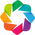

In [221]:
import holoviews as hv

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import Range1d, NumeralTickFormatter, FixedTicker, Legend
from bokeh.palettes import Set1_7, RdBu5, RdBu11

from pandas.api.types import CategoricalDtype

#output_notebook()
hv.extension('bokeh')

In [251]:
regiao = Regiao_pardo_Publico.index.values
qtd = Regiao_pardo_Publico.iloc[0:5,1].values

dataPardo = []

for i in range(0,len(qtd)):
    dataPardo.append((regiao[i],qtd[i]))

regiao = Regiao_pardo_Privado.index.values
qtd = Regiao_pardo_Privado.iloc[0:5,1].values

dataPardo1 = []

for i in range(0,len(qtd)):
    dataPardo1.append((regiao[i],qtd[i]))

In [437]:
%%opts Bars [height=500, width=500, xrotation=90, show_legend=True] (color=Cycle(Set1_7)) 

bar1 = hv.Bars(dataPardo,hv.Dimension('Região'), 'Porcentagem %')

bar2 = hv.Bars(dataPardo1,hv.Dimension('Região'), 'Porcentagem %')

regiao_pardo = bar1 + bar2
regiao_pardo


:Layout
   .Bars.I  :Bars   [Região]   (Porcentagem %)
   .Bars.II :Bars   [Região]   (Porcentagem %)

In [254]:
regiao = Regiao_branco_Publico.index.values
qtd = Regiao_branco_Publico.iloc[0:5,1].values

dataBranco = []

for i in range(0,len(qtd)):
    dataBranco.append((regiao[i],qtd[i]))

regiao = Regiao_branco_Privado.index.values
qtd = Regiao_branco_Privado.iloc[0:5,1].values

dataBranco1 = []

for i in range(0,len(qtd)):
    dataBranco1.append((regiao[i],qtd[i]))

In [256]:
%%opts Bars [height=500, width=500, xrotation=90, show_legend=True] (color=Cycle(Set1_7)) 
bar1 = hv.Bars(dataBranco,hv.Dimension('Região'), 'Porcentagem %')

bar2 = hv.Bars(dataBranco1,hv.Dimension('Região'), 'Porcentagem %')

regiao_branco = bar1 + bar2
regiao_branco

:Layout
   .Bars.I  :Bars   [Região]   (Porcentagem %)
   .Bars.II :Bars   [Região]   (Porcentagem %)

In [257]:
regiao = Regiao_negro_Publico.index.values
qtd = Regiao_negro_Publico.iloc[0:5,1].values

dataNegro = []

for i in range(0,len(qtd)):
    dataNegro.append((regiao[i],qtd[i]))

regiao = Regiao_negro_Privado.index.values
qtd = Regiao_negro_Privado.iloc[0:5,1].values

dataNegro1 = []

for i in range(0,len(qtd)):
    dataNegro1.append((regiao[i],qtd[i]))

In [258]:
%%opts Bars [height=500, width=500, xrotation=90, show_legend=True] (color=Cycle(Set1_7)) 
bar1 = hv.Bars(dataNegro,hv.Dimension('Região'), 'Porcentagem %')

bar2 = hv.Bars(dataNegro1,hv.Dimension('Região'), 'Porcentagem %')

regiao_negro = bar1 + bar2
regiao_negro

:Layout
   .Bars.I  :Bars   [Região]   (Porcentagem %)
   .Bars.II :Bars   [Região]   (Porcentagem %)

In [259]:
regiao = Regiao_indio_Publico.index.values
qtd = Regiao_indio_Publico.iloc[0:5,1].values

dataIndio = []

for i in range(0,len(qtd)):
    dataIndio.append((regiao[i],qtd[i]))

regiao = Regiao_indio_Privado.index.values
qtd = Regiao_indio_Privado.iloc[0:5,1].values

dataIndio1 = []

for i in range(0,len(qtd)):
    dataIndio1.append((regiao[i],qtd[i]))

In [260]:
%%opts Bars [height=500, width=500, xrotation=90, show_legend=True] (color=Cycle(Set1_7)) 
bar1 = hv.Bars(dataIndio,hv.Dimension('Região'), 'Porcentagem %')

bar2 = hv.Bars(dataIndio1,hv.Dimension('Região'), 'Porcentagem %')

regiao_indio = bar1 + bar2
regiao_indio

:Layout
   .Bars.I  :Bars   [Região]   (Porcentagem %)
   .Bars.II :Bars   [Região]   (Porcentagem %)

In [261]:
regiao = Regiao_amarelo_Publico.index.values
qtd = Regiao_amarelo_Publico.iloc[0:5,1].values

dataAmarelo = []

for i in range(0,len(qtd)):
    dataAmarelo.append((regiao[i],qtd[i]))

regiao = Regiao_amarelo_Privado.index.values
qtd = Regiao_amarelo_Privado.iloc[0:5,1].values

dataAmarelo1 = []

for i in range(0,len(qtd)):
    dataAmarelo1.append((regiao[i],qtd[i]))

In [262]:
%%opts Bars [height=500, width=500, xrotation=90, show_legend=True] (color=Cycle(Set1_7)) 
bar1 = hv.Bars(dataAmarelo,hv.Dimension('Região'), 'Porcentagem %')

bar2 = hv.Bars(dataAmarelo1,hv.Dimension('Região'), 'Porcentagem %')

regiao_amarelo = bar1 + bar2
regiao_amarelo

:Layout
   .Bars.I  :Bars   [Região]   (Porcentagem %)
   .Bars.II :Bars   [Região]   (Porcentagem %)

In [263]:
regiao = Regiao_nqd_Publico.index.values
qtd = Regiao_nqd_Publico.iloc[0:5,1].values

dataNqd = []

for i in range(0,len(qtd)):
    dataNqd.append((regiao[i],qtd[i]))

regiao = Regiao_nqd_Privado.index.values
qtd = Regiao_nqd_Privado.iloc[0:5,1].values

dataNqd1 = []

for i in range(0,len(qtd)):
    dataNqd1.append((regiao[i],qtd[i]))

In [264]:
%%opts Bars [height=500, width=500, xrotation=90, show_legend=True] (color=Cycle(Set1_7)) 
bar1 = hv.Bars(dataNqd,hv.Dimension('Região'), 'Porcentagem %')

bar2 = hv.Bars(dataNqd1,hv.Dimension('Região'), 'Porcentagem %')

regiao_nqd = bar1 + bar2
regiao_nqd

:Layout
   .Bars.I  :Bars   [Região]   (Porcentagem %)
   .Bars.II :Bars   [Região]   (Porcentagem %)

In [265]:
regiao = Regiao_ndi_Publico.index.values
qtd = Regiao_ndi_Publico.iloc[0:5,1].values

dataNdi = []

for i in range(0,len(qtd)):
    dataNdi.append((regiao[i],qtd[i]))

regiao = Regiao_ndi_Privado.index.values
qtd = Regiao_ndi_Privado.iloc[0:5,1].values

dataNdi1 = []

for i in range(0,len(qtd)):
    dataNdi1.append((regiao[i],qtd[i]))

In [266]:
%%opts Bars [height=500, width=500, xrotation=90, show_legend=True] (color=Cycle(Set1_7)) 
bar1 = hv.Bars(dataNdi,hv.Dimension('Região'), 'Porcentagem %')

bar2 = hv.Bars(dataNdi1,hv.Dimension('Região'), 'Porcentagem %')

regiao_ndi = bar1 + bar2
regiao_ndi

:Layout
   .Bars.I  :Bars   [Região]   (Porcentagem %)
   .Bars.II :Bars   [Região]   (Porcentagem %)

In [273]:
estado = Estado_pardo_Publico.index.values
qtd = Estado_pardo_Publico.iloc[0:27,1].values

dataPardo = []

for i in range(0,len(qtd)):
    dataPardo.append((estado[i],qtd[i]))

estado = Estado_pardo_Privado.index.values
qtd = Estado_pardo_Privado.iloc[0:27,1].values

dataPardo1 = []

for i in range(0,len(qtd)):
    dataPardo1.append((estado[i],qtd[i]))

In [274]:
%%opts Bars [height=500, width=500, xrotation=90, show_legend=True] (color=Cycle(Set1_7)) 
bar1 = hv.Bars(dataPardo,hv.Dimension('Estado'), 'Porcentagem %')

bar2 = hv.Bars(dataPardo1,hv.Dimension('Estado'), 'Porcentagem %')

estado_pardo = bar1 + bar2
estado_pardo

:Layout
   .Bars.I  :Bars   [Estado]   (Porcentagem %)
   .Bars.II :Bars   [Estado]   (Porcentagem %)

In [277]:
estado = Estado_branco_Publico.index.values
qtd = Estado_branco_Publico.iloc[0:27,1].values

dataBranco = []

for i in range(0,len(qtd)):
    dataBranco.append((estado[i],qtd[i]))

estado = Estado_branco_Privado.index.values
qtd = Estado_branco_Privado.iloc[0:27,1].values

dataBranco1 = []

for i in range(0,len(qtd)):
    dataBranco1.append((estado[i],qtd[i]))

In [278]:
%%opts Bars [height=500, width=500, xrotation=90, show_legend=True] (color=Cycle(Set1_7)) 
bar1 = hv.Bars(dataBranco,hv.Dimension('Estado'), 'Porcentagem %')

bar2 = hv.Bars(dataBranco,hv.Dimension('Estado'), 'Porcentagem %')

estado_branco = bar1 + bar2
estado_branco

:Layout
   .Bars.I  :Bars   [Estado]   (Porcentagem %)
   .Bars.II :Bars   [Estado]   (Porcentagem %)

In [283]:
estado = Estado_negro_Publico.index.values
qtd = Estado_negro_Publico.iloc[0:27,1].values

dataNegro = []

for i in range(0,len(qtd)):
    dataNegro.append((estado[i],qtd[i]))

estado = Estado_negro_Privado.index.values
qtd = Estado_negro_Privado.iloc[0:27,1].values

dataNegro1 = []

for i in range(0,len(qtd)):
    dataNegro1.append((estado[i],qtd[i]))

In [284]:
%%opts Bars [height=500, width=500, xrotation=90, show_legend=True] (color=Cycle(Set1_7)) 
bar1 = hv.Bars(dataNegro,hv.Dimension('Estado'), 'Porcentagem %')

bar2 = hv.Bars(dataNegro1,hv.Dimension('Estado'), 'Porcentagem %')

estado_negro = bar1 + bar2
estado_negro

:Layout
   .Bars.I  :Bars   [Estado]   (Porcentagem %)
   .Bars.II :Bars   [Estado]   (Porcentagem %)

In [285]:
estado = Estado_indio_Publico.index.values
qtd = Estado_indio_Publico.iloc[0:27,1].values

dataIndio = []

for i in range(0,len(qtd)):
    dataIndio.append((estado[i],qtd[i]))

estado = Estado_indio_Privado.index.values
qtd = Estado_indio_Privado.iloc[0:27,1].values

dataIndio1 = []

for i in range(0,len(qtd)):
    dataIndio1.append((estado[i],qtd[i]))

In [286]:
%%opts Bars [height=500, width=500, xrotation=90, show_legend=True] (color=Cycle(Set1_7)) 
bar1 = hv.Bars(dataIndio,hv.Dimension('Estado'), 'Porcentagem %')

bar2 = hv.Bars(dataIndio1,hv.Dimension('Estado'), 'Porcentagem %')

estado_indio = bar1 + bar2
estado_indio

:Layout
   .Bars.I  :Bars   [Estado]   (Porcentagem %)
   .Bars.II :Bars   [Estado]   (Porcentagem %)

In [306]:
estado = Estado_amarelo_Publico.index.values
qtd = Estado_amarelo_Publico.iloc[0:27,1].values

dataAmarelo = []

for i in range(0,len(qtd)):
    dataAmarelo.append((estado[i],qtd[i]))

estado = Estado_amarelo_Privado.index.values
qtd = Estado_amarelo_Privado.iloc[0:27,1].values

dataAmarelo1 = []

for i in range(0,len(qtd)):
    dataAmarelo1.append((estado[i],qtd[i]))

In [307]:
%%opts Bars [height=500, width=500, xrotation=90, show_legend=True] (color=Cycle(Set1_7)) 
bar1 = hv.Bars(dataAmarelo,hv.Dimension('Estado'), 'Porcentagem %')

bar2 = hv.Bars(dataAmarelo1,hv.Dimension('Estado'), 'Porcentagem %')

estado_amarelo = bar1 + bar2
estado_amarelo

:Layout
   .Bars.I  :Bars   [Estado]   (Porcentagem %)
   .Bars.II :Bars   [Estado]   (Porcentagem %)

In [308]:
estado = Estado_nqd_Publico.index.values
qtd = Estado_nqd_Publico.iloc[0:27,1].values

dataNqd = []

for i in range(0,len(qtd)):
    dataNqd.append((estado[i],qtd[i]))

estado = Estado_nqd_Privado.index.values
qtd = Estado_nqd_Privado.iloc[0:27,1].values

dataNqd1 = []

for i in range(0,len(qtd)):
    dataNqd1.append((estado[i],qtd[i]))

In [309]:
%%opts Bars [height=500, width=500, xrotation=90, show_legend=True] (color=Cycle(Set1_7)) 
bar1 = hv.Bars(dataNqd,hv.Dimension('Estado'), 'Porcentagem %')

bar2 = hv.Bars(dataNqd1,hv.Dimension('Estado'), 'Porcentagem %')

estado_nqd = bar1 + bar2
estado_nqd

:Layout
   .Bars.I  :Bars   [Estado]   (Porcentagem %)
   .Bars.II :Bars   [Estado]   (Porcentagem %)

In [310]:
estado = Estado_ndi_Publico.index.values
qtd = Estado_ndi_Publico.iloc[0:27,1].values

dataNdi = []

for i in range(0,len(qtd)):
    dataNdi.append((estado[i],qtd[i]))

estado = Estado_ndi_Privado.index.values
qtd = Estado_ndi_Privado.iloc[0:27,1].values

dataNdi1 = []

for i in range(0,len(qtd)):
    dataNdi1.append((estado[i],qtd[i]))

In [311]:
%%opts Bars [height=500, width=500, xrotation=90, show_legend=True] (color=Cycle(Set1_7)) 
bar1 = hv.Bars(dataNdi,hv.Dimension('Estado'), 'Porcentagem %')

bar2 = hv.Bars(dataNdi1,hv.Dimension('Estado'), 'Porcentagem %')

estado_ndi = bar1 + bar2
estado_ndi

:Layout
   .Bars.I  :Bars   [Estado]   (Porcentagem %)
   .Bars.II :Bars   [Estado]   (Porcentagem %)

In [350]:
top10_Publico = curso_raca_Publico.nlargest(10,'total')
top10_Publico

raca,Aluno não quis declarar cor/raça,Amarela,Branca,Indígena,Não dispõe da informação,Parda,Preta,total,% Branca,% Amarela,% Indígena,% Parda,% Preta,% Aluno não quis declarar cor/raça,% Não dispõe da informação
curso,,,,,,,,,,,,,,,
Pedagogia,42901.0,1543.0,38189.0,1396.0,6822.0,42480.0,13311.0,146642.0,26.04,1.05,0.95,28.97,9.08,29.26,4.65
Administração,26373.0,1435.0,36738.0,452.0,3531.0,25066.0,6898.0,100493.0,36.56,1.43,0.45,24.94,6.86,26.24,3.51
Direito,20676.0,915.0,32749.0,546.0,2818.0,20620.0,6687.0,85011.0,38.52,1.08,0.64,24.26,7.87,24.32,3.31
Formação de professor de matemática,20404.0,892.0,20531.0,342.0,2315.0,24668.0,5803.0,74955.0,27.39,1.19,0.46,32.91,7.74,27.22,3.09
Formação de professor de biologia,18773.0,839.0,20697.0,353.0,3154.0,20781.0,5900.0,70497.0,29.36,1.19,0.50,29.48,8.37,26.63,4.47
Formação de professor de língua/literatura vernácula (português),16203.0,690.0,16325.0,436.0,2251.0,22227.0,5873.0,64005.0,25.51,1.08,0.68,34.73,9.18,25.32,3.52
Agronomia,10018.0,662.0,21820.0,283.0,1090.0,14853.0,4130.0,52856.0,41.28,1.25,0.54,28.10,7.81,18.95,2.06
Ciências contábeis,10790.0,843.0,19279.0,247.0,1656.0,15078.0,4876.0,52769.0,36.53,1.60,0.47,28.57,9.24,20.45,3.14
Engenharia civil,10757.0,859.0,23170.0,204.0,1464.0,12882.0,3099.0,52435.0,44.19,1.64,0.39,24.57,5.91,20.51,2.79


In [411]:
top10_Privado = curso_raca_Privado.nlargest(10,'total')
top10_Privado

raca,Aluno não quis declarar cor/raça,Amarela,Branca,Indígena,Não dispõe da informação,Parda,Preta,total,% Branca,% Amarela,% Indígena,% Parda,% Preta,% Aluno não quis declarar cor/raça,% Não dispõe da informação
curso,,,,,,,,,,,,,,,
Direito,286339.0,16112.0,414446.0,5861.0,20614.0,234826.0,55133.0,1033331.0,40.11,1.56,0.57,22.73,5.34,27.71,1.99
Administração,318098.0,13671.0,351847.0,4318.0,31094.0,218476.0,47193.0,984697.0,35.73,1.39,0.44,22.19,4.79,32.30,3.16
Pedagogia,249834.0,8469.0,252705.0,4390.0,26626.0,177443.0,39686.0,759153.0,33.29,1.12,0.58,23.37,5.23,32.91,3.51
Ciências contábeis,152356.0,6701.0,152717.0,2381.0,9799.0,110862.0,22815.0,457631.0,33.37,1.46,0.52,24.23,4.99,33.29,2.14
Engenharia civil,122791.0,8584.0,175045.0,3366.0,6322.0,98270.0,22761.0,437139.0,40.04,1.96,0.77,22.48,5.21,28.09,1.45
Enfermagem,101889.0,5480.0,92729.0,3010.0,6041.0,96087.0,23316.0,328552.0,28.22,1.67,0.92,29.25,7.10,31.01,1.84
Psicologia,85316.0,4672.0,111573.0,1911.0,6100.0,58503.0,15756.0,283831.0,39.31,1.65,0.67,20.61,5.55,30.06,2.15
Gestão de pessoal / recursos humanos,107250.0,3512.0,74076.0,1296.0,1715.0,71679.0,16240.0,275768.0,26.86,1.27,0.47,25.99,5.89,38.89,0.62
Formação de professor de educação física,106864.0,3094.0,56911.0,828.0,1909.0,41687.0,12706.0,223999.0,25.41,1.38,0.37,18.61,5.67,47.71,0.85


In [409]:
top10_Publico1 = top10_Publico.iloc[0:9,8:15]
top10_Publico2 = top10_Publico.iloc[0:9,0:7]

top10_Privado1 = top10_Privado.iloc[0:9,8:15]
top10_Privado2 = top10_Privado.iloc[0:9,0:7]

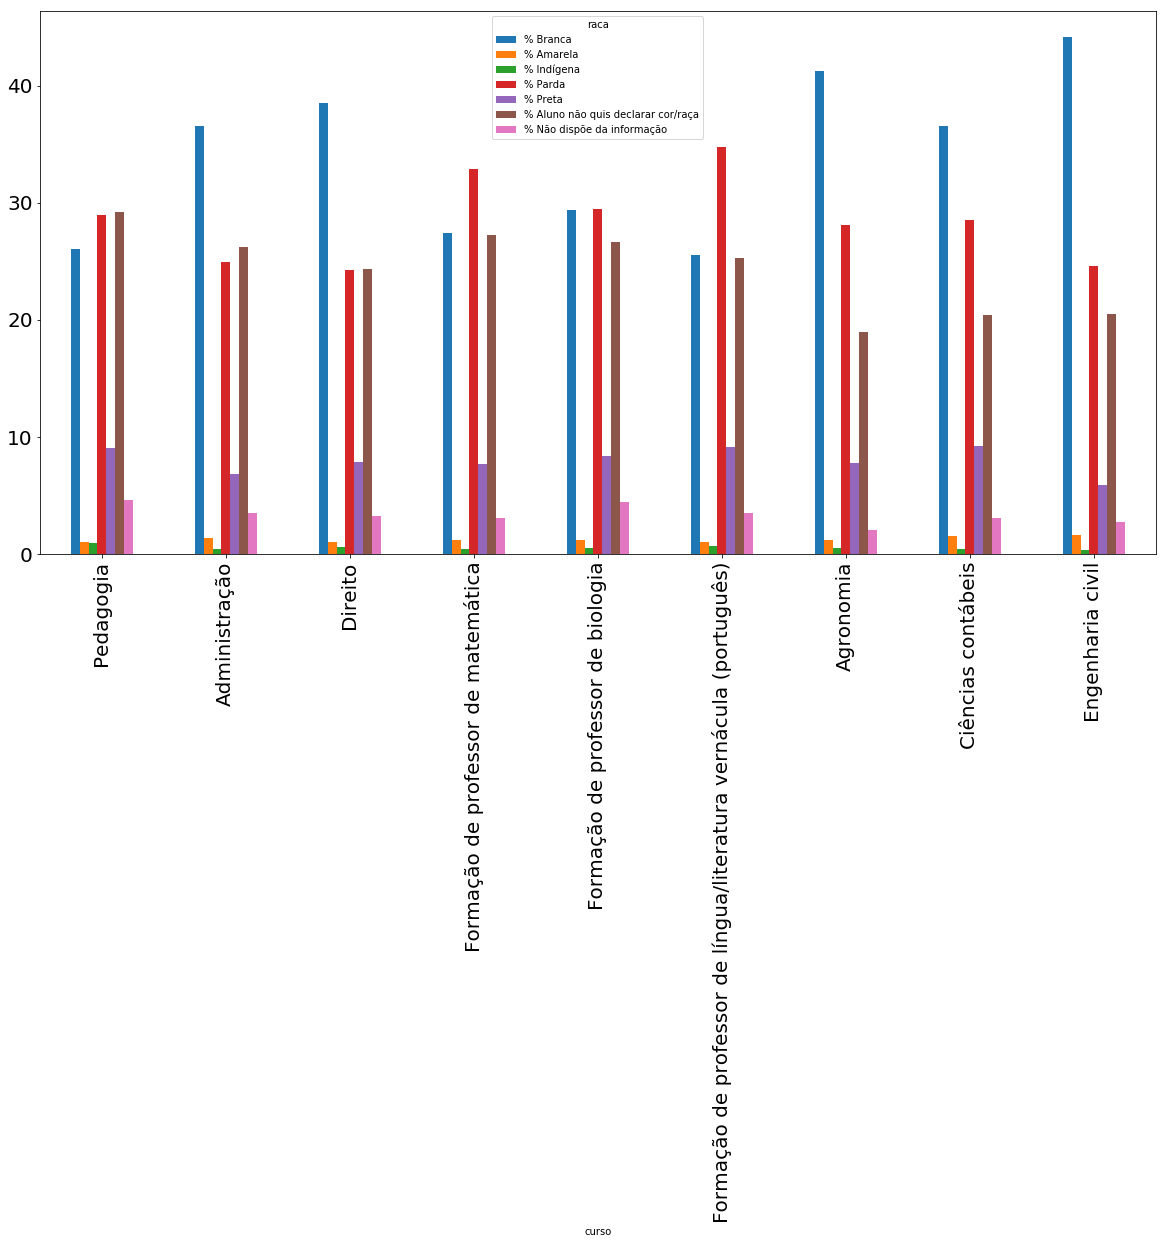

In [414]:
top10_Publico1.plot( y = top10_Publico.columns[8:15], kind = 'bar',figsize=(20,10),fontsize=20)


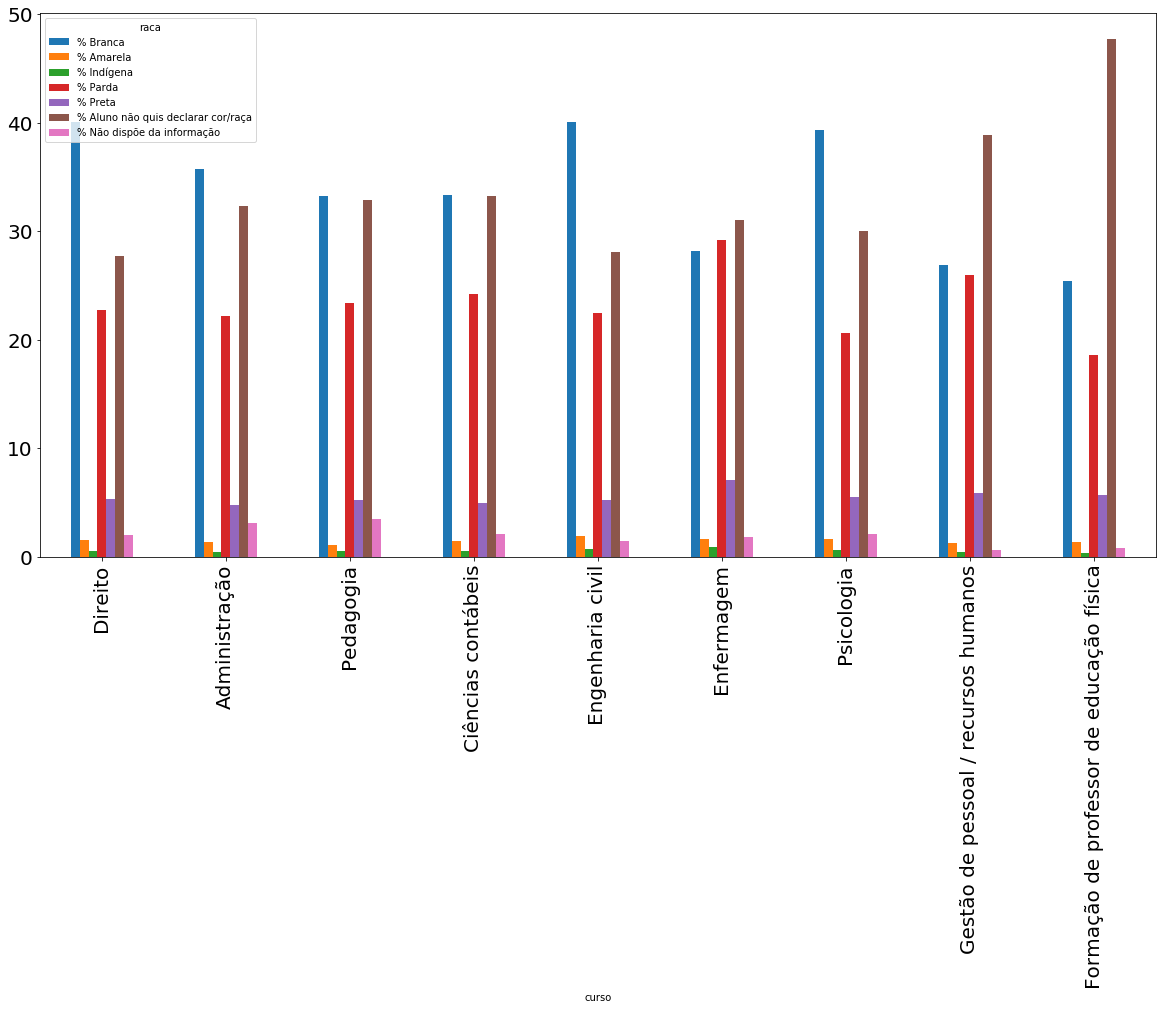

In [422]:
top10_Privado1.plot( y = top10_Privado.columns[8:15], kind = 'bar',figsize=(20,10),fontsize=20)


In [423]:
top10_IES_Publico = IES_raca_Publico.nlargest(10,'total')

top10_IES_Privado = IES_raca_Privado.nlargest(10,'total')

In [424]:
top10_IES_Publico1 = top10_IES_Publico.iloc[0:9,8:15]
top10_IES_Publico2 = top10_IES_Publico.iloc[0:9,0:7]

top10_IES_Privado1 = top10_IES_Privado.iloc[0:9,8:15]
top10_IES_Privado2 = top10_IES_Privado.iloc[0:9,0:7]

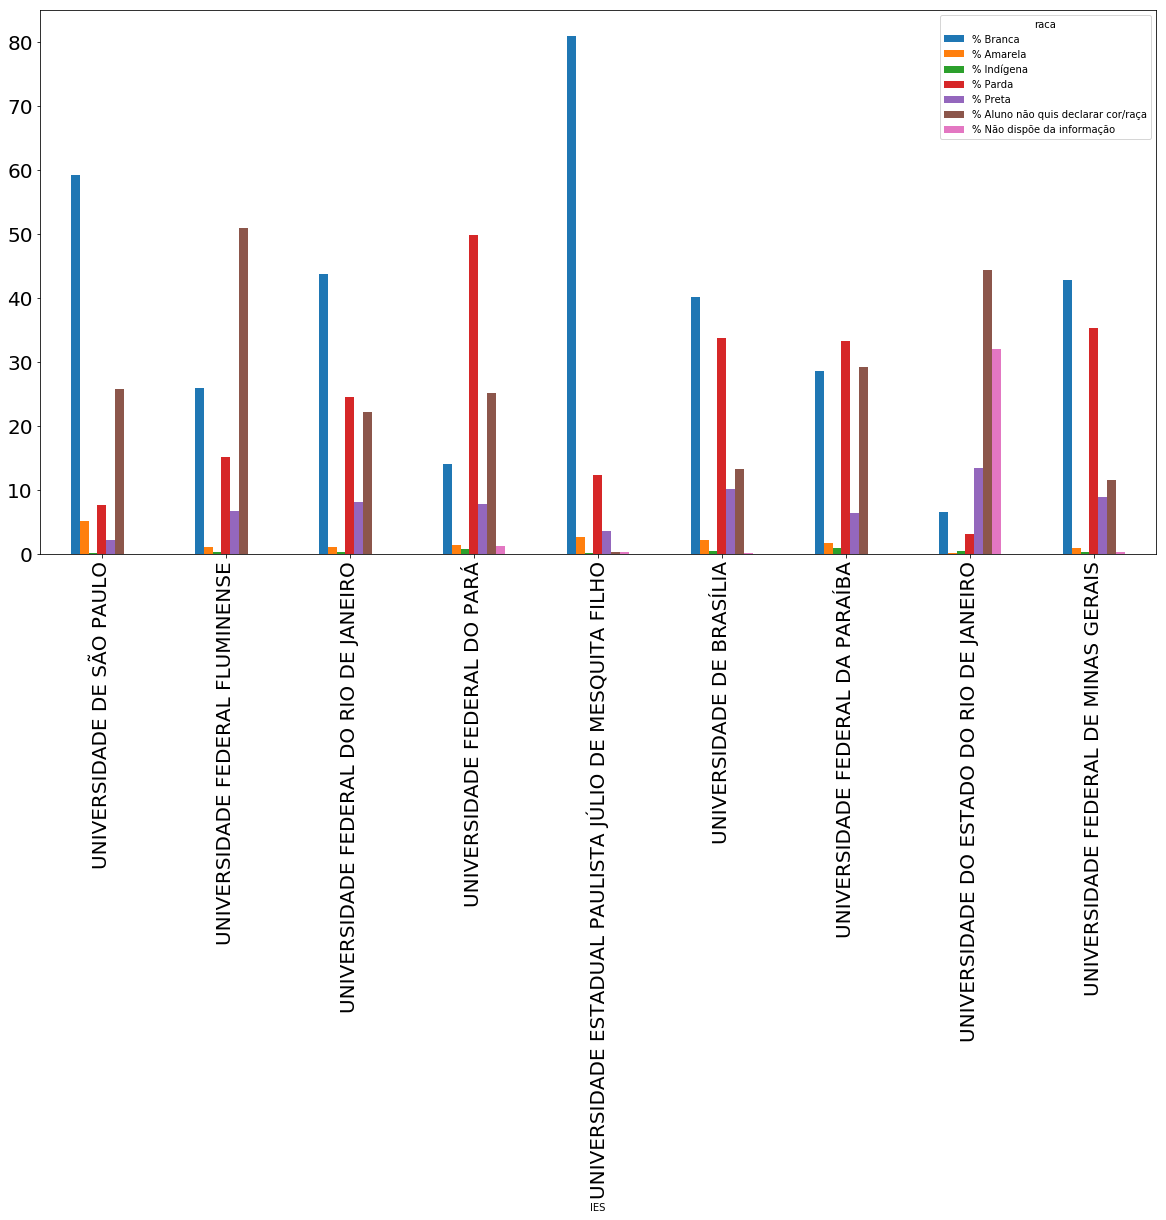

In [427]:
top10_IES_Publico1.plot( y = top10_IES_Publico.columns[8:15], kind = 'bar',figsize=(20,10),fontsize=20)


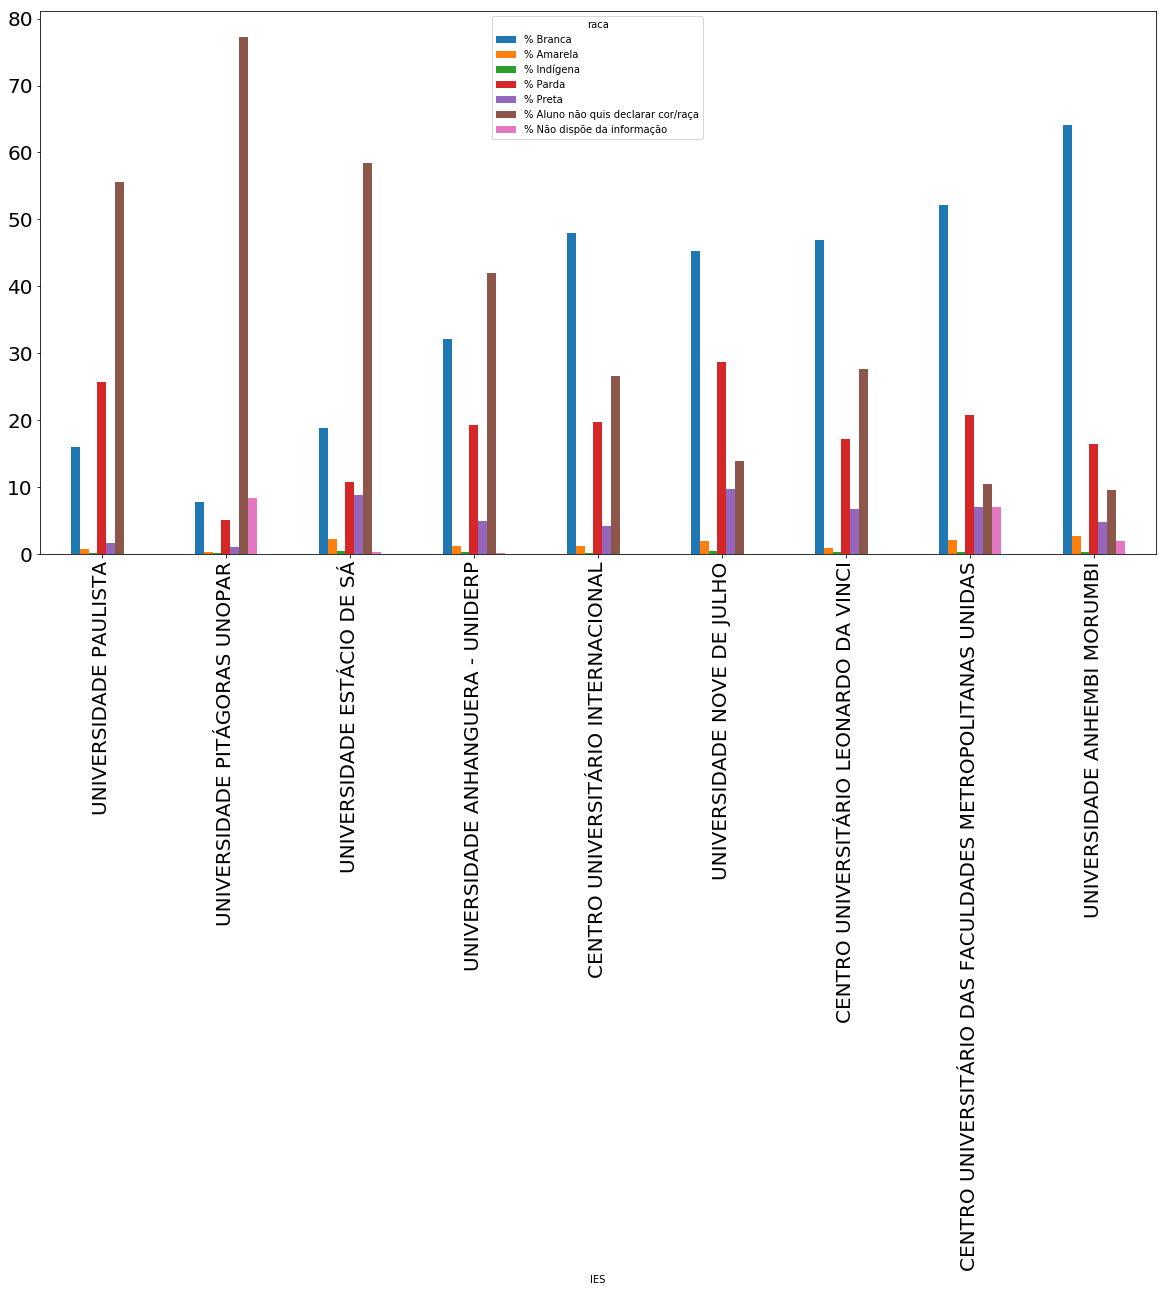

In [430]:
top10_IES_Privado1.plot( y = top10_IES_Privado.columns[8:15], kind = 'bar',figsize=(20,10),fontsize=20)
